# Obligatorio ML

* 315622: Juan Assandri

* 338835: Oliver Kaminski

* 208166: Felipe Burgos

## Objetivos del trabajo

La pobreza, según el Instituto Nacional de Estadística (INE) de Uruguay, se define como la insuficiencia de ingresos para cubrir una canasta básica de bienes y servicios que satisfagan las necesidades alimentarias y no alimentarias mínimas. Esta medida se calcula a partir del ingreso per cápita del hogar, y los hogares cuyo ingreso está por debajo de esta línea se consideran pobres. La metodología incluye la consideración de variaciones regionales y temporales en el costo de vida, basándose en datos de la Encuesta Continua de Hogares.

En 2009, Uruguay adoptó una nueva metodología utilizando los datos de la Encuesta Continua de Hogares (ECH) 2006. Esta nueva metodología introdujo una evaluación más integral, considerando no solo los ingresos, sino también el acceso a bienes y servicios esenciales, reflejando mejor las diversas dimensiones de la pobreza. Además, se ajustaron los umbrales de pobreza e indigencia para reflejar cambios en los costos de vida y las necesidades nutricionales.

Desarrollar un modelo de clasificación para predecir la situación de pobreza en Uruguay utilizando datos de la Encuesta Continua de Hogares (ECH) 2022 es importante porque, aunque la variable ingreso es un indicador crucial, la pobreza es un fenómeno multidimensional. Un modelo que integre diversas características socioeconómicas permite una evaluación más precisa. Considera factores como educación, empleo, salud y condiciones de vivienda, que también influyen en la calidad de vida. Esto ayuda a identificar a las personas en riesgo de pobreza que podrían no ser capturadas solo por ingresos, permitiendo implementar políticas públicas más efectivas y focalizadas.
 
Se aplicaran modelos de técnicas de clasificación como (Naïve Bayes, Regresión Logística, Árboles de Decisión, Ensambles: Bagging, Random Forest, Boosting) los cuales serán evaluados mediante las metrícas de, Precisión, Accuracy, Recall y F1_score para determinar el modelo que optimice dicha clasificación.

Se busca desarrollar un modelo de clasificación para predecir la situación de pobreza de las personas en Uruguay utilizando datos de la Encuesta Continua de Hogares en Uruguay 2022, que sea capaz de  clasificar correctamente a las personas en dos categorías: pobre y no pobre, en función de las características socioeconómicas recopiladas en la encuesta.



## Presentación del caso de estudio

* Predicción para determinar si una persona es pobre o no:
    - desarrollar un modelo de predicción para la determinación de si una persona es pobre o no a partir de los datos de la ECH.
    
* Objetivo:

    * **Tarea (T)**: Predicción de la determinación de si una persona es pobre o no (ECH contiene la variable determinada 'pobre', descripta como 'Pobreza Según Metodología del 2006')
    * **Entrenamiento (E)**: Utilizamos los datos de la Encuesta Continua de Hogares del INE (ECH) de 2022        
    * **Performance (P)**: Buscamos maximizar la metrica de recall considerando el desempeño en F1-score.

## Links de referencia


[Encuesta Continua de Hogares 2022](https://www.ine.gub.uy/Anda5/index.php/catalog/730/get-microdata)

[Base anual ECH 2022](https://www.ine.gub.uy/Anda5/index.php/catalog/730/download/1143)

[scikit-learn Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

[scikit-learn Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[scikit-learn DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[scikit-learn BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

[scikit-learn RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[scikit-learn GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)



## Instalación de Bibliotecas

In [4]:
!pip install pandas numpy seaborn matplotlib scikit-learn scipy
!pip install imbalanced-learn
!pip install mlxtend


## Importación de las Librerías

In [5]:
#Importar librerías
import pandas as pd
import numpy as np
import os
import seaborn as sns

from sklearn.model_selection import train_test_split # División del dataset
import matplotlib.pyplot as plt # Plotear
from sklearn.linear_model import LinearRegression # Modelo de ML
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn import metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report # Métricas

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score


from scipy.stats import randint, uniform

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.classifier import StackingClassifier

import warnings
warnings.filterwarnings("ignore")

### Seteo del Directorio de Trabajo:


In [6]:
# obtengo el directorio de trabajo actual
os.getcwd()

'/home/jovyan/work/ECH/src'

In [7]:
# seteo y verifico el directorio de trabajo en la raíz del proyecto
os.chdir(r'/home/jovyan/work/ECH') # se incluye 'r' antes de la dirección para atender adecuadamente a los caracteres especiales

print('El nuevo -actual- directorio de trabajo es: ', os.getcwd())

El nuevo -actual- directorio de trabajo es:  /home/jovyan/work/ECH


## Importación de los datos:

Se cargaron los datos de la encuesta continua de hogares de Uruguay del año 2022 (ECH_2022.csv).

In [8]:
#Importar data
df = pd.read_csv(r'data/ECH_2022.csv')

Se muestran las variables contenidas en el Dataset para obtener una primera aproximación de las variables que podemos utilizar.

In [9]:
columns = df.columns.values.tolist()
print(columns)

['ID', 'nper', 'anio', 'mes', 'GR', 'region', 'region_4', 'dpto', 'ccz', 'secc', 'segm', 'barrio', 'c1', 'c2', 'c3', 'c4', 'c6', 'c6_1', 'd8_1', 'd8_2', 'd8_3', 'd8_4', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16', 'd18', 'd260', 'd19', 'd20', 'd21_1', 'd21_2', 'd21_3', 'd21_6', 'd21_4', 'd21_4_1', 'd21_5', 'd21_5_1', 'd21_20', 'd21_7', 'd21_10', 'd21_11', 'd21_12', 'd21_13', 'd21_14', 'd21_14_1', 'd21_15', 'd21_15_1', 'd21_15_2', 'd21_15_3', 'd21_15_4', 'd21_15_5', 'd21_15_6', 'd21_16', 'd21_16_1', 'd21_16_2', 'd21_21', 'd21_17', 'd21_18', 'd21_18_1', 'd21_19', 'd21_19_1', 'd181', 'd229', 'd230', 'd231', 'd232', 'd184', 'd184_1', 'd23', 'd24', 'd25', 'e557', 'e26', 'e27', 'e29_1', 'e29_2', 'e29_3', 'e29_4', 'e29_5', 'e29_5_1', 'e29_6', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e185', 'e186_1', 'e186_2', 'e186_3', 'e186_4', 'e37', 'e37_2', 'e234_2', 'e38', 'e38_1', 'e39', 'e39_2', 'e235_2', 'e236', 'e236_2', 'e236_4', 'e45_cv', 'e45_1_1_cv', 'e45_1_1_1_cv', 'e45_2_1_cv

### Preparación de los datos



* **Configuración de Parámetros para Modelos de Clasificación**:
    - ***semilla***: Se utiliza para asegurar la reproducibilidad de los resultados. Al fijar una semilla aleatoria (semilla = 1234), se garantiza que los resultados de los modelos sean consistentes cada vez que se ejecutan, permitiendo comparaciones justas.

    - ***k_folds***: Define el número de pliegues (o folds) para la validación cruzada (k_folds = 10). La validación cruzada se usa para evaluar el rendimiento de los modelos de manera más robusta, dividiendo los datos en k partes, entrenando el modelo en k-1 partes y validándolo en la parte restante, repitiendo este proceso k veces.

    - ***iteracion_dt, iteracion_Bag, iteracion_RF, iteracion_Boo***: Especifican el número de iteraciones para la búsqueda de hiperparámetros utilizando métodos como "Randomized Search" y "Grid Search" para los modelos DecisionTreeClassifier, BaggingClassifier, RandomForestClassifier y GradientBoostingClassifier respectivamente. Esto permite encontrar los mejores parámetros para cada modelo, optimizando su rendimiento.
    


In [10]:
# Configuración de Parámetros para Modelos de Clasificación
semilla = 1234
k_folds = 10
iteracion_dt = 100
iteracion_Bag = 100
iteracion_RF = 100
iteracion_Boo = 100

* **Selección de variables como hipotesis que conforman nuestro sesgo inductivo**:

In [11]:
df_2022 = pd.DataFrame() # se define el dataset.
categoricas = [] # definimos arrelgo "categoricas" para guardar las variables de este tipo.
numericas = [] # definimos arrelgo "numericas" para guardar las variables de este tipo.


# características de personas

df_2022['region'] = df['region_4'].astype('category')
df_2022['sexo'] = df['e26'].astype('category')
df_2022['ascendencia'] = df['e29_6'].astype('category')

df_2022['cant_hijos'] = df['e186_1'] + df['e186_2']

df_2022['edad'] = df['e27']

df_2022['atencion_salud'] = df['e45_cv'].astype('category')

df_2022['analfabeto'] = df['e48'].astype('category')
df_2022['nivel_educ'] = df['e579'].astype('category')
df_2022['tipo_educ'] = df['e581'].astype('category')

df_2022['recibe_alim_ctr_educ'] = df['e582'].astype('category')

df_2022['becas'] = df['e582_4'].astype('category')
df_2022['cant_com_sem'] = df['e582_1'] + df['e582_2'] + df['e582_3']
df_2022['razon_no_fin_educ'] = df['e202'].astype('category')

df_2022['recibe_pension'] = df['f125'].astype('category')

df_2022['condicion_act_eco'] = df['POBPCOAC'].astype('category')

# características del hogar

df_2022['tipo_vivienda'] = df['c1'].astype('category')
df_2022['material_paredes'] = df['c2'].astype('category')
df_2022['material_techo'] = df['c3'].astype('category')
df_2022['material_pisos'] = df['c4'].astype('category')

df_2022['tenencia_vivienda'] = df['d8_1'].astype('category')

df_2022['origen_agua'] = df['d11'].astype('category')

df_2022['fuente_energia_hog'] = df['d18'].astype('category')

df_2022['calefon'] = df['d21_1'].astype('category')
df_2022['refrigerador'] = df['d21_3'].astype('category')
df_2022['AA'] = df['d21_14'].astype('category')
df_2022['PC'] = df['d21_15'].astype('category')
df_2022['internet'] = df['d21_16'].astype('category')

df_2022['vehiculo'] = df['d21_18'].astype('category')
df_2022['cant_ciclomotor'] = df['d21_19'].astype('category')

df_2022['servicio_dom'] = df['d181'].astype('category')

# variable de respuesta

df_2022['es_pobre'] = df['pobre'].astype('category')


A efectos de simplificar nuestro codigo, guardamos en arreglos de acuerdo al tipo de variable.

In [12]:
# Recorrer el DataFrame para identificar columnas categóricas
for col in df_2022.columns:
    if pd.api.types.is_categorical_dtype(df_2022[col]):
        categoricas.append(col)

In [13]:
categoricas

['region',
 'sexo',
 'ascendencia',
 'atencion_salud',
 'analfabeto',
 'nivel_educ',
 'tipo_educ',
 'recibe_alim_ctr_educ',
 'becas',
 'razon_no_fin_educ',
 'recibe_pension',
 'condicion_act_eco',
 'tipo_vivienda',
 'material_paredes',
 'material_techo',
 'material_pisos',
 'tenencia_vivienda',
 'origen_agua',
 'fuente_energia_hog',
 'calefon',
 'refrigerador',
 'AA',
 'PC',
 'internet',
 'vehiculo',
 'cant_ciclomotor',
 'servicio_dom',
 'es_pobre']

In [14]:
# Recorrer el DataFrame para identificar columnas numéricas
for col in df_2022.columns:
    if pd.api.types.is_numeric_dtype(df_2022[col]):
        numericas.append(col)

In [15]:
numericas

['cant_hijos', 'edad', 'cant_com_sem']

# Análisis estadístico descriptivo y transformaciones de variables

## Estructura del Dataset

**Informacion obtenida del .info()**
 
El DataFrame df_2022 contiene 55,056 registros y 31 columnas, con 28 columnas categóricas y 3 columnas numéricas (cant_hijos, edad y cant_com_sem). Todas las columnas tienen valores completos, sin datos faltantes, lo que garantiza la integridad del conjunto de datos. Las columnas categóricas incluyen variables como región, sexo, ascendencia, nivel educativo, y tipo de vivienda, mientras que las columnas numéricas cuantifican variables como la cantidad de hijos considerada solo para mujeres de 14 años o más, la edad de las personas y la cantidad de comidas semanales que recibe una persona que asiste a un centro educativo público. 

El uso de tipos de datos category para las columnas categóricas optimiza la memoria, utilizando aproximadamente 2.7 MB. 

El DataFrame, bien estructurado y completo, está listo para ser utilizado en el desarrollo de modelos de clasificación para predecir la situación de pobreza en Uruguay, proporcionando una base sólida para análisis y modelado posteriores. La ausencia de valores faltantes y la optimización de la memoria son aspectos positivos que facilitan el manejo y procesamiento de los datos.

In [16]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55056 entries, 0 to 55055
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   region                55056 non-null  category
 1   sexo                  55056 non-null  category
 2   ascendencia           55056 non-null  category
 3   cant_hijos            55056 non-null  int64   
 4   edad                  55056 non-null  int64   
 5   atencion_salud        55056 non-null  category
 6   analfabeto            55056 non-null  category
 7   nivel_educ            55056 non-null  category
 8   tipo_educ             55056 non-null  category
 9   recibe_alim_ctr_educ  55056 non-null  category
 10  becas                 55056 non-null  category
 11  cant_com_sem          55056 non-null  int64   
 12  razon_no_fin_educ     55056 non-null  category
 13  recibe_pension        55056 non-null  category
 14  condicion_act_eco     55056 non-null  category
 15  ti

**Informacion obtenida del .head()**
 
El método df_2022.head() muestra las primeras cinco filas del DataFrame df_2022, proporcionando una vista preliminar de los datos. 

In [17]:
df_2022.head()

,region,sexo,ascendencia,cant_hijos,edad,atencion_salud,analfabeto,nivel_educ,tipo_educ,recibe_alim_ctr_educ,...,fuente_energia_hog,calefon,refrigerador,AA,PC,internet,vehiculo,cant_ciclomotor,servicio_dom,es_pobre
0,1,2,3,0,75,2,1,0,0,0,...,1,1,1,1,1,1,2,2,2,0
1,1,1,3,0,31,2,1,10,1,0,...,1,1,1,1,1,1,1,2,2,0
2,1,2,3,0,29,2,1,0,0,0,...,1,1,1,1,1,1,1,2,2,0
3,1,2,3,0,26,2,1,0,0,0,...,1,1,1,1,1,1,1,2,2,0
4,1,2,3,0,50,2,1,0,0,0,...,1,1,1,2,1,1,1,2,2,0


**Informacion obtenida del .describe()**

Se observa que de pd.isnull(df_2022).describe() concluimos que el DataFrame df_2022 no contiene datos faltantes en ninguna de sus columnas. Este análisis confirma que cada una de las 31 columnas del DataFrame tiene 55,056 entradas no nulas. Para todas las columnas, el valor False es el más frecuente (apareciendo en todos los registros), lo que indica que no hay valores nulos en el conjunto de datos. 

In [18]:
pd.isnull(df_2022).describe()

,region,sexo,ascendencia,cant_hijos,edad,atencion_salud,analfabeto,nivel_educ,tipo_educ,recibe_alim_ctr_educ,...,fuente_energia_hog,calefon,refrigerador,AA,PC,internet,vehiculo,cant_ciclomotor,servicio_dom,es_pobre
count,55056,55056,55056,55056,55056,55056,55056,55056,55056,55056,...,55056,55056,55056,55056,55056,55056,55056,55056,55056,55056
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,55056,55056,55056,55056,55056,55056,55056,55056,55056,55056,...,55056,55056,55056,55056,55056,55056,55056,55056,55056,55056


### Visualización de las frecuencias de las Variables Categóricas en el DataFrame

El código nos proporciona una visión rápida de las variables categóricas en el DataFrame df_2022. Para cada variable categórica listada en cat_vars, imprime su nombre seguido de la frecuencia absoluta y la frecuencia relativa de cada categoría presente en esa variable. Esto permite ver cuántas veces aparece cada categoría (frecuencia absoluta) y el porcentaje que representa sobre el total de registros (frecuencia relativa).

Del análisis rápido de la variable de respuesta es_pobre en el DataFrame df_2022, podemos observar que la mayoría de los registros corresponden a personas que no son pobres. Específicamente, el 91.56% de las personas no son pobres (es_pobre = 0), mientras que solo el 8.44% son pobres (es_pobre = 1). Esta distribución nos indica un desequilibrio en las clases, lo cual es importante considerar al desarrollar modelos de clasificación. 

In [19]:
# Una visión rápida de las variables categóricas
cat_vars = categoricas


for v in cat_vars:
  print('\n{}'.format(v))
  print(df_2022[v].value_counts()) # frecuencia abosluta
  print(df_2022[v].value_counts()/df_2022[v].value_counts().sum()) # frecuencia relativa


region
2    24900
1    20278
3     6993
4     2885
Name: region, dtype: int64
2    0.452267
1    0.368316
3    0.127016
4    0.052401
Name: region, dtype: float64

sexo
2    29448
1    25608
Name: sexo, dtype: int64
2    0.534874
1    0.465126
Name: sexo, dtype: float64

ascendencia
3    28447
0    24086
1     1819
4      668
2       24
5       12
Name: ascendencia, dtype: int64
3    0.516692
0    0.437482
1    0.033039
4    0.012133
2    0.000436
5    0.000218
Name: ascendencia, dtype: float64

atencion_salud
2    33079
1    17327
4     2296
3     1691
7      644
6       16
5        3
Name: atencion_salud, dtype: int64
2    0.600825
1    0.314716
4    0.041703
3    0.030714
7    0.011697
6    0.000291
5    0.000054
Name: atencion_salud, dtype: float64

analfabeto
1    51174
2     3882
Name: analfabeto, dtype: int64
1    0.92949
2    0.07051
Name: analfabeto, dtype: float64

nivel_educ
0     40127
2      4248
1      2249
10     2187
6      2127
4      2004
7       509
9       388
5   

## Visualización de a las Variables Numeriacas en el DataFrame

Del análisis descriptivo de las variables numéricas cant_hijos, edad y cant_com_sem en el DataFrame df_2022, podemos observar que la muestra contiene personas con edades que van desde 0 a 103 años (media = 41).

En esta etapa no podemos sacar varias conclusiones respecto a la variable cant_hijos y cant_com_sem debido que el analisis descriptvo contempla los 55056 registros, y estas variables estan condicionadas de origen de acuerdo al ECH, ya que la cant_hijos solo contempla a mujeres mayores de 14 años de edad, y la cant_com_sem contempla solo a las personas que asisten a centros educativos públicos. El describe() no tiene en cuenta esa consideración por lo que nos otorga un analisis estadistico respecto a todos los datos de la muestra.

En principio nos quedamos con que los máximos a simple vista estan representando outlierts, los cuales seran abordados en la siguiente sección.


In [20]:
df_2022.describe()

,cant_hijos,edad,cant_com_sem
count,55056.000000,55056.000000,55056.000000
mean,0.777772,40.995768,0.487776
std,1.425726,23.613868,2.407568
min,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000
50%,0.000000,41.000000,0.000000
75%,1.000000,60.000000,0.000000
max,17.000000,103.000000,90.000000


### Analisis Gráfico de Histogramas de distribución de cada variable categórica


***Región:***
La mayor parte de la población se concentra en la región 2 (Interior, localidades de 5000 habitantes o más), seguida por la región 1 (Montevideo).

***Sexo:***
Hay una ligera mayoría de mujeres (2) en la muestra comparado con los hombres (1).

***Ascendencia:***
La ascendencia 3 (Blanca) es la que tiene mayor representación en la muestra. 

***Atención de Salud:***
La mayoría de la población tiene acceso a atención de salud privada en Mutualistas (2) (Mutualista), seguido por atención publica (1) (MSP / ASSE).

***Analfabetismo:***
La gran mayoría de la población no es analfabeta (1).

***Nivel Educativo:***
Si bien el nivel educativo 0 es predominante, este no se encuentra en el diccionario de ECH por lo que entendemos que no corresponde a una respuesta, la siguiente categoria con más frecuencia en la muestra es el nivel (2) (Primaria común) seguido por nivel (1) Educación inicial o educación preescolar.

***Tipo de Educación:***
Se da una situación similar en la que muchas observaciones no tienen asignado un número para esta variable, la categoria mayoritaria es represantada por el (1) (Pública).

***Recibe Alimento en Centro Educativo:***
Para las personas que asisten a educación pública, podemos observar que mayoritariamente no reciben alimentación en la misma, sin embargo una proporción is lo hace (1).

***Becas:***
De las personas que asisten a educaión pública, de acuerdo a la categoría (2), no reciben becas de apoyo, sin embargo una proporción si lo hace. La categoria (0) puede explicarse o por que no se tiene una respuesta para la observación o por que no asisten a educación pública y no se tiene respuesta sobe la misma.

Para personas entre 12 y 29 años que asistieron y no finalizaron el nivel

***Razones para No Finalizar la Educación:***
La principal razón para no finalizar la educación es la (1) (No tenía interés, le interesaba aprender otras cosas), la categoría (0) puede explicarse por que no estan comprendidos en el rango etario de la pregunta, debido a que siguen estuandio, no abandonaron o no entra en la condición de la pregunta por otro motivo.

***Recibe Pensión:***
De las personas que reicben pensión, la mayoría de los individuos reciben Pensión por fallecimiento (de sobrevivencia) (2).

***Condición de Actividad Económica:***
La mayor parte de la población está en categoría de Ocupados (2), seguida de Inactivo, jubilado (10).

***Tipo de Vivienda:***
La mayoría de las personas viven en casas (1).

***Material de las Paredes:***
La mayoría de las casas tienen paredes de Ladrillos, ticholos o bloques con terminación (1).

***Material del Techo:***
El material más común del techo es Planchada de hormigón con protección (tejas u otros) (1).

***Material del Piso:***
La mayoría de los pisos son de Cerámica, parqué, baldosas, moqueta, linóleo (1).

***Tenencia de Vivienda:***
La mayoría de las personas son Propietario/a de la vivienda y el terreno y ya los pagó (2).

***Fuente de Agua:***
La mayoría de las personas obtienen agua del Red general (1).

***Fuente de Energía del Hogar:***
La mayoría de los hogares utilizan electricidad (1).

***Calefón:***
La mayoría de los hogares tienen calefón (1).

***Refrigerador:***
Casi todos los hogares tienen refrigerador (1).

***Aire Acondicionado:***
La mayoría de los hogares no tienen aire acondicionado (2).

***Computadora Personal:***
La mayoría de los hogares tienen una computadora personal (1).

***Internet:***
La mayoría de los hogares tienen acceso a internet (1).

***Vehículo:***
La propiedad de vehículos está casi igualmente dividida entre quienes tienen (1) y no tienen (2) vehículo. Aun asi, presenta mayor frecuencía quienes tienen respecto a quienes no.

***Cantidad de Ciclomotor:***
La mayoría de las personas no tienen ciclomotor (2).

***Servicio Doméstico:***
La mayoría de las personas no tienen servicio doméstico (2).

***Pobreza:***
La mayoría de las personas no son pobres (0).


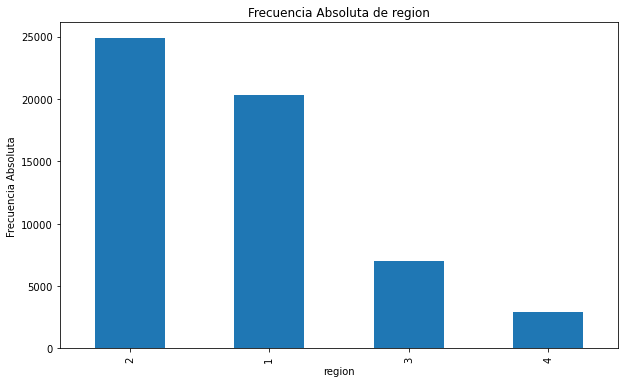

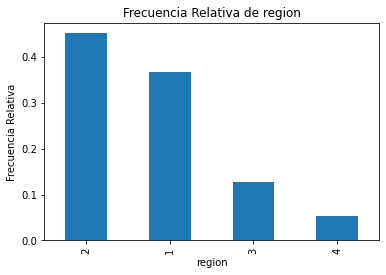

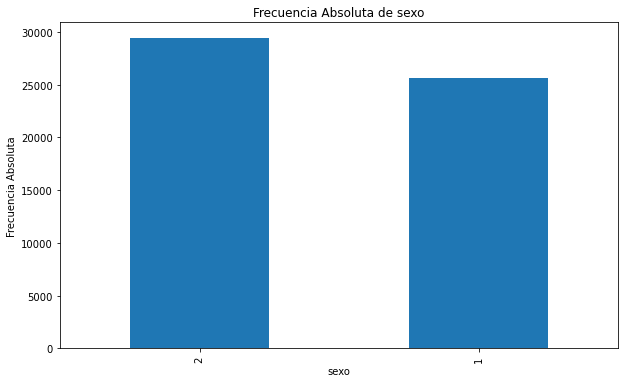

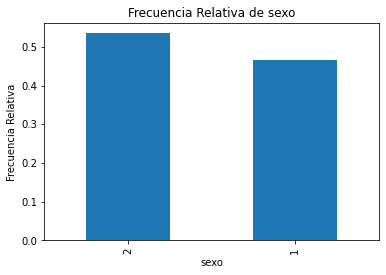

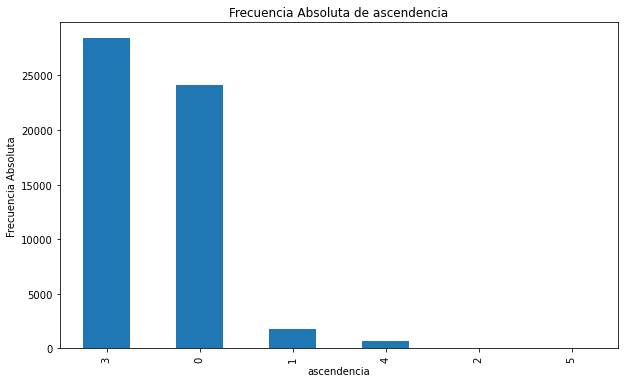

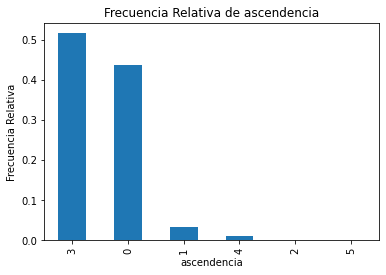

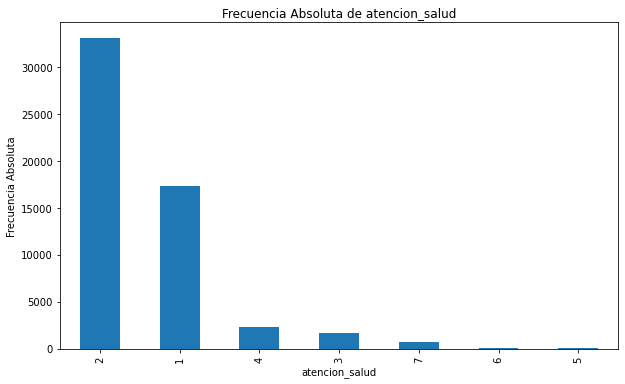

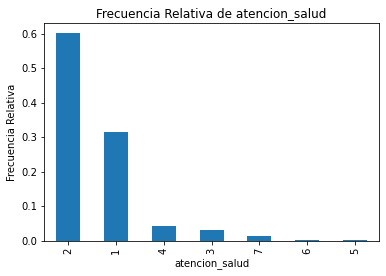

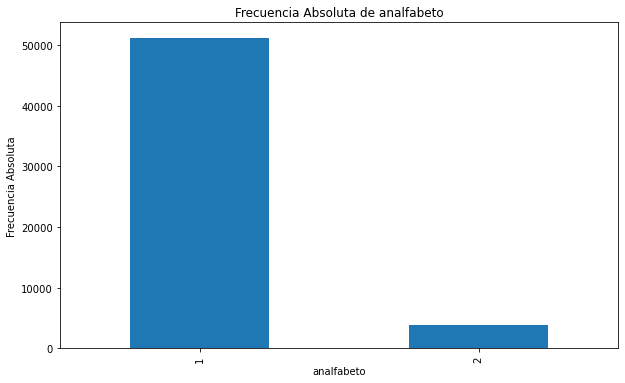

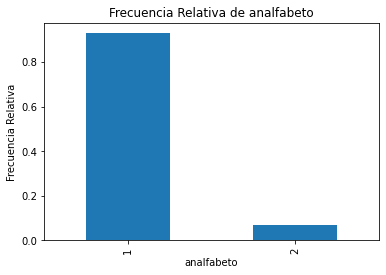

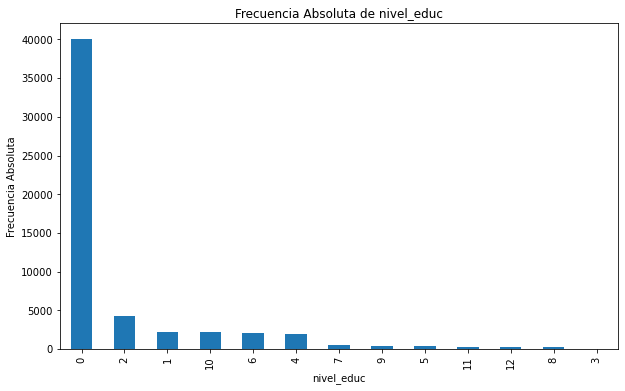

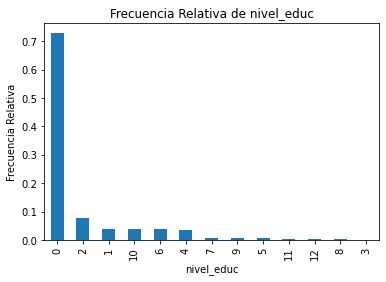

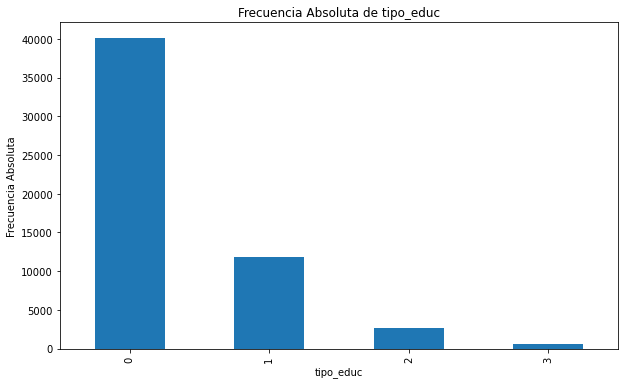

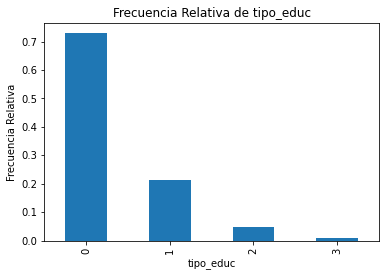

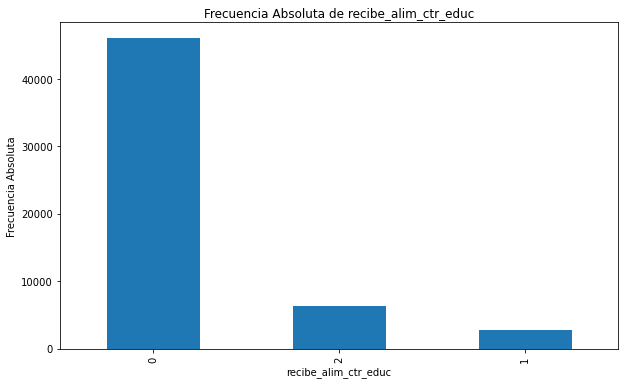

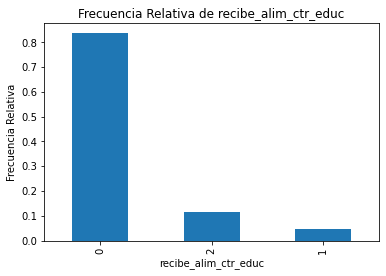

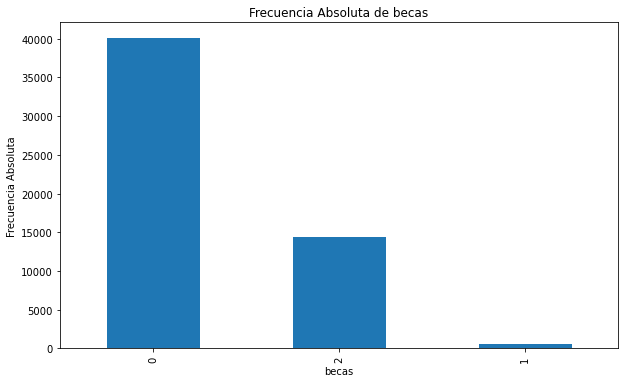

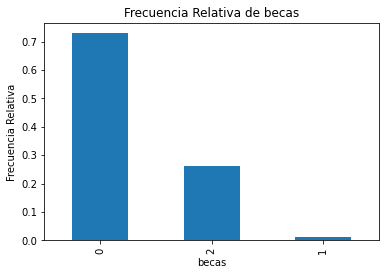

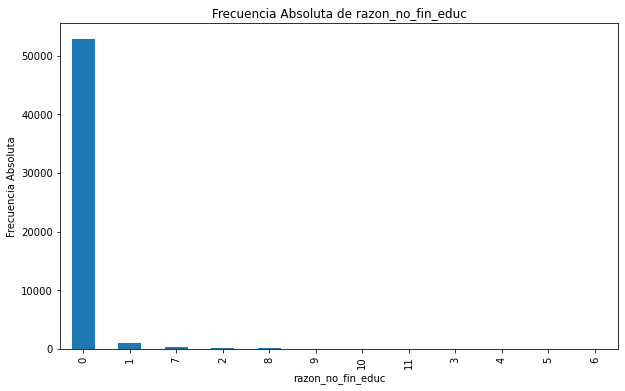

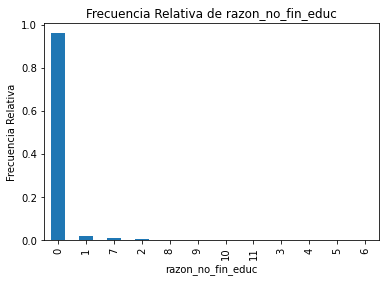

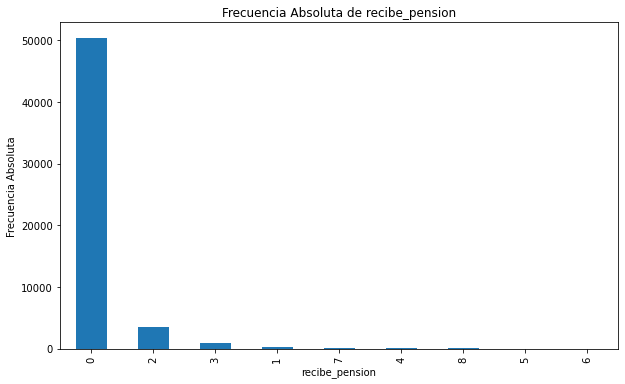

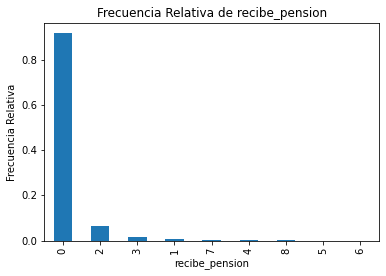

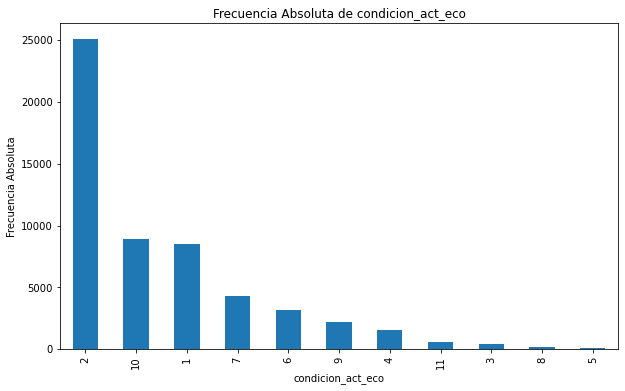

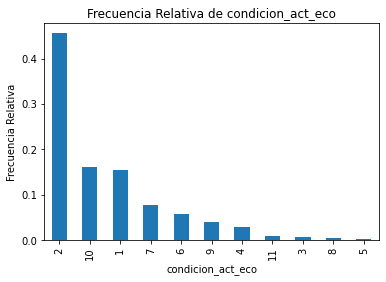

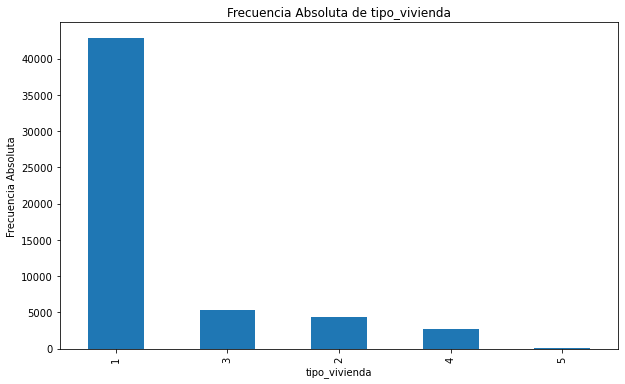

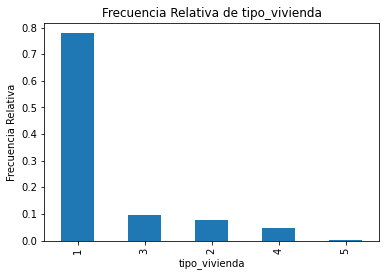

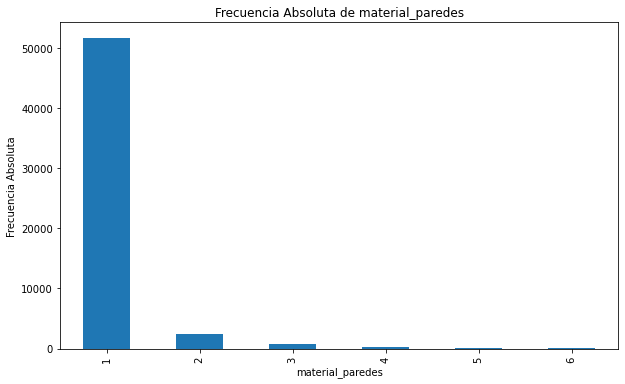

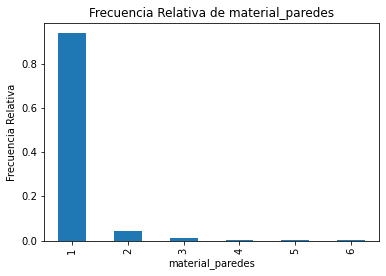

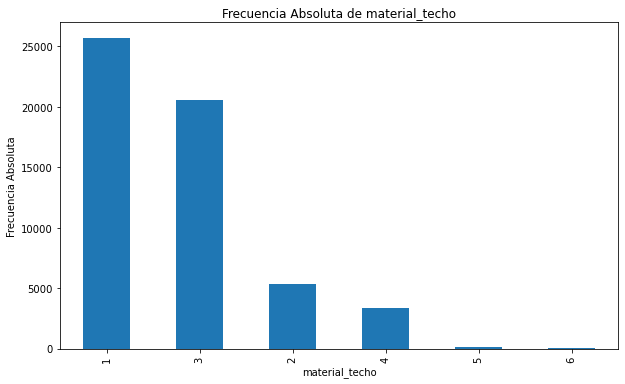

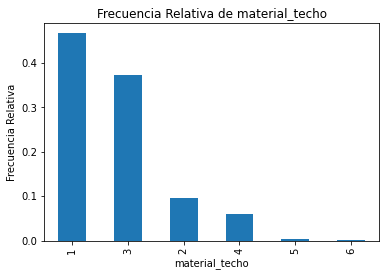

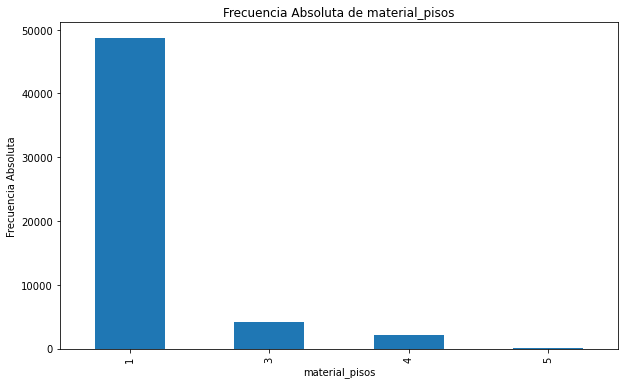

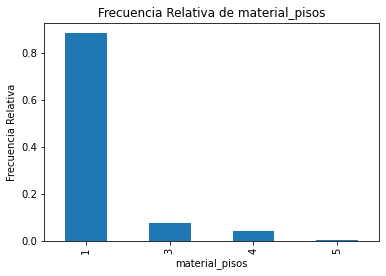

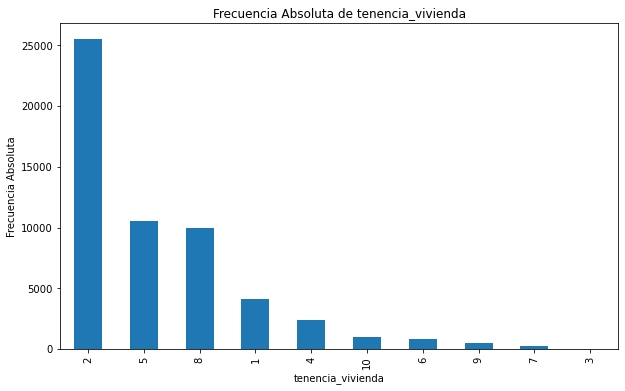

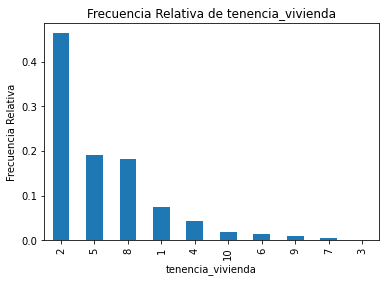

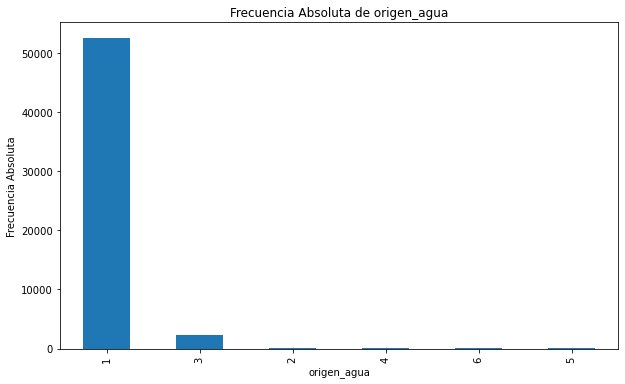

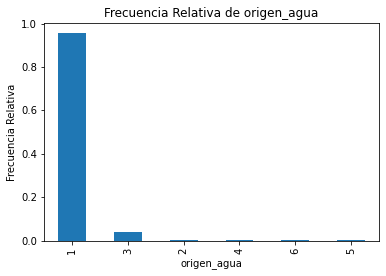

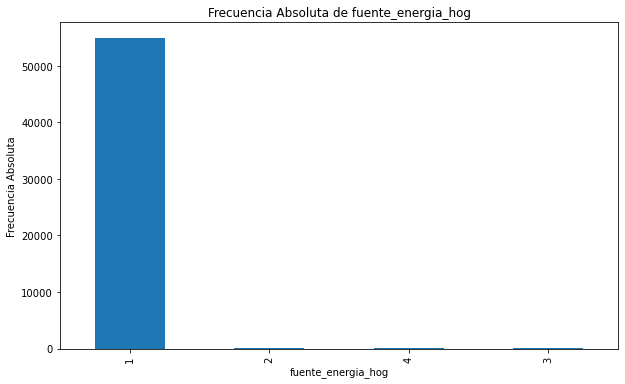

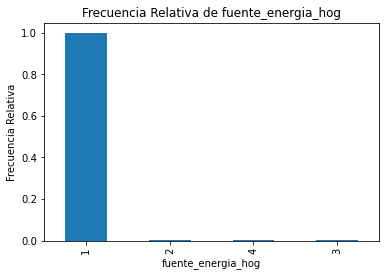

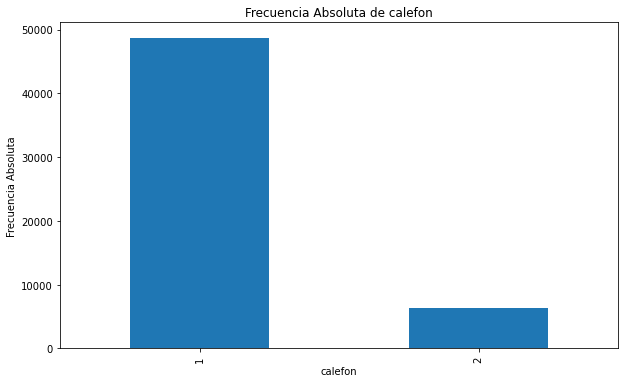

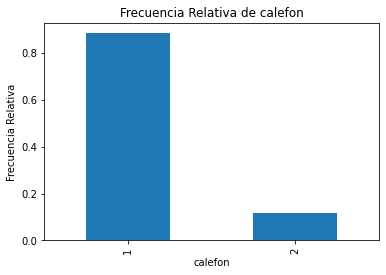

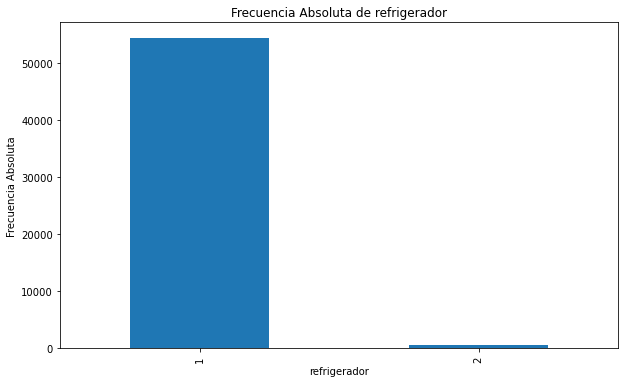

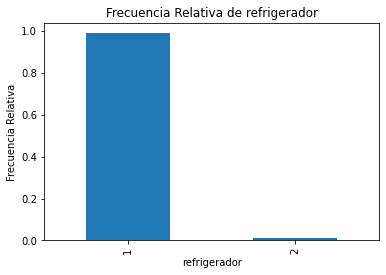

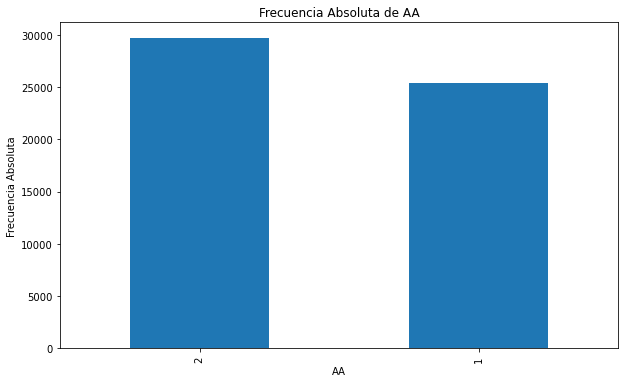

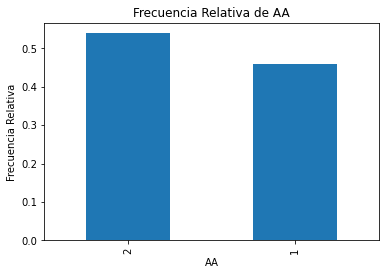

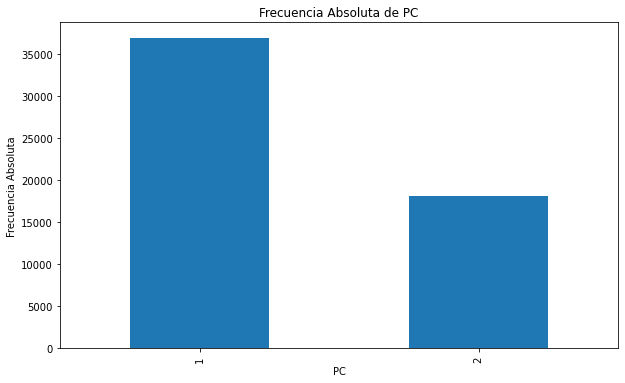

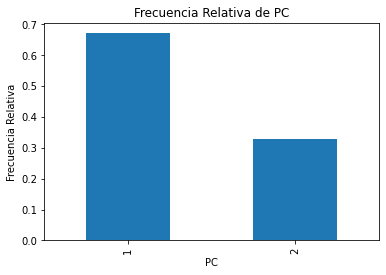

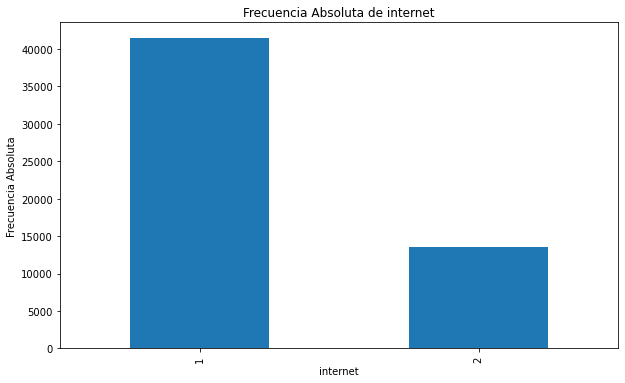

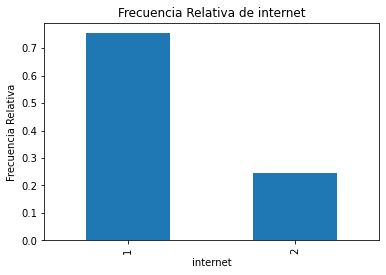

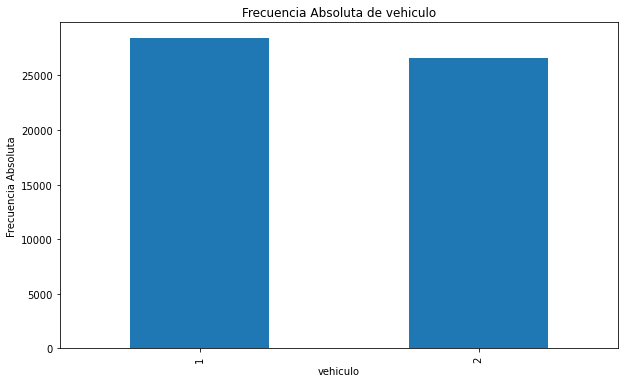

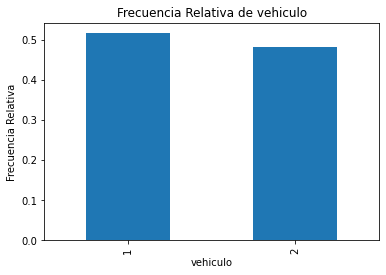

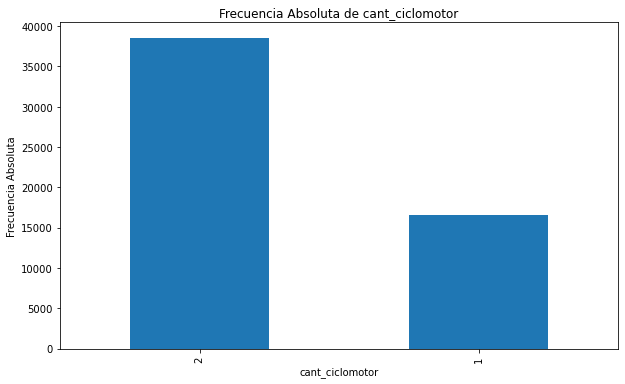

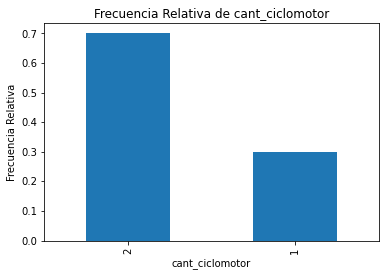

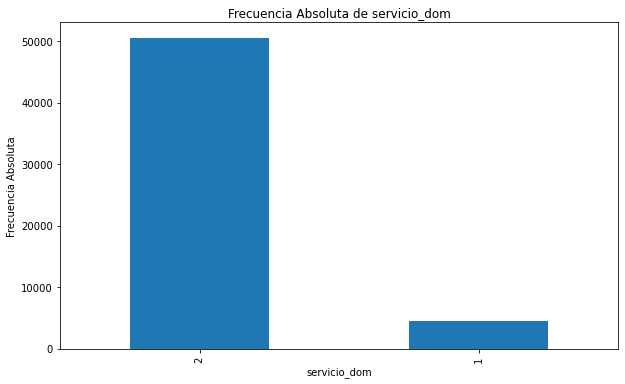

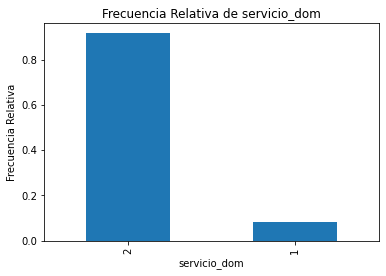

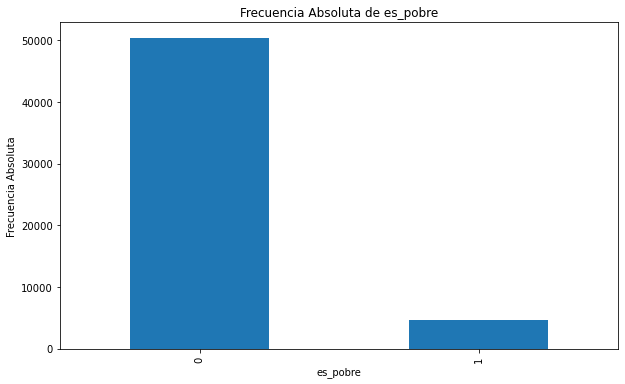

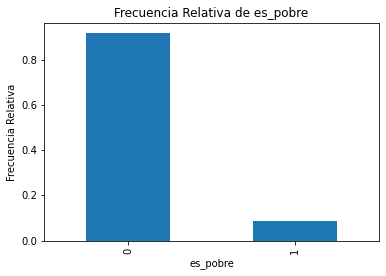

In [21]:
#Gráfico de Histogramas de distribución de cada variable categórica    

# Aquí está el código para graficar las distribuciones
for v in categoricas:
    plt.figure(figsize=(10, 6))
    
    # Frecuencia absoluta
    df_2022[v].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia Absoluta de {v}')
    plt.xlabel(v)
    plt.ylabel('Frecuencia Absoluta')
    plt.show()
    
    # Frecuencia relativa
    (df_2022[v].value_counts() / df_2022[v].value_counts().sum()).plot(kind='bar')
    plt.title(f'Frecuencia Relativa de {v}')
    plt.xlabel(v)
    plt.ylabel('Frecuencia Relativa')
    plt.show()

### Agrupación y Análisis de Edad

Para entender mejor la distribución de la variable `edad` dentro de nuestro conjunto de datos, agrupamos las edades en intervalos específicos. Este enfoque nos permite identificar patrones y outliers que pueden influir en la prediccion de nuestra variable de respuesta.


In [22]:
# Definir los intervalos para la edad
intervalos_edad = pd.interval_range(start=-1, end=110, freq=5)

# Filtrar los datos copiando el DataFrame original
filtro_edad = df_2022.copy()

# Crear una nueva columna con los intervalos de edad
filtro_edad['intervalo_edad'] = pd.cut(filtro_edad['edad'], bins=intervalos_edad)

# Agrupar los datos por intervalo de edad y contar la frecuencia de cada intervalo
edades_agrupadas = filtro_edad.groupby('intervalo_edad').size()

# Mostrar el total de datos considerados
total_datos_edad = edades_agrupadas.sum()
print(f"Total de datos considerados por edad: {total_datos_edad}\n")

# Mostrar los resultados
print(edades_agrupadas)


Total de datos considerados por edad: 55056

intervalo_edad
(-1, 4]       2404
(4, 9]        3343
(9, 14]       3528
(14, 19]      3826
(19, 24]      3589
(24, 29]      3316
(29, 34]      3134
(34, 39]      3283
(39, 44]      3533
(44, 49]      3654
(49, 54]      3560
(54, 59]      3621
(59, 64]      3638
(64, 69]      3225
(69, 74]      2662
(74, 79]      2091
(79, 84]      1441
(84, 89]       767
(89, 94]       341
(94, 99]        90
(99, 104]       10
(104, 109]       0
dtype: int64


### Agrupación y Análisis de Edad

Bajo el mismo concepto que en la edad, agrupamos en intervalos la distribución de la variable `cant_hijos`, de la misma forma, podemos identificar patrones y outliers que pueden influir en la prediccion de nuestra variable de respuesta.


In [23]:
# Definir los intervalos para la cantidad de hijos
intervalos_hijos = pd.interval_range(start=-1, end=20, freq=2)

# Filtrar los datos copiando el DataFrame original
filtro_hijos = df_2022.copy()

# Crear una nueva columna con los intervalos de cantidad de hijos
filtro_hijos['intervalo_hijos'] = pd.cut(filtro_hijos['cant_hijos'], bins=intervalos_hijos)

# Agrupar los datos por intervalo de cantidad de hijos y contar la frecuencia de cada intervalo
hijos_agrupados = filtro_hijos.groupby('intervalo_hijos').size()

# Mostrar el total de datos considerados
total_datos_hijos = hijos_agrupados.sum()
print(f"Total de datos considerados por cantidad de hijos: {total_datos_hijos}\n")

# Mostrar los resultados
print(hijos_agrupados)


Total de datos considerados por cantidad de hijos: 55056

intervalo_hijos
(-1, 1]     42360
(1, 3]       9831
(3, 5]       2073
(5, 7]        522
(7, 9]        182
(9, 11]        64
(11, 13]       15
(13, 15]        6
(15, 17]        3
(17, 19]        0
dtype: int64


### Agrupación y Análisis de cantidad de comidas por semana

A igual que en las variables cuantitativas anteriores, analizamos en intervalos la variable `cant_com_sem`. Nuevamente verificamos la presencia de outliers.

In [24]:
# Definir los intervalos para la cantidad de comida consumida semanalmente
intervalos_comida = pd.interval_range(start=-1, end=100, freq=5)

# Filtrar los datos copiando el DataFrame original
filtro_comida = df_2022.copy()

# Crear una nueva columna con los intervalos de cantidad de comida consumida semanalmente
filtro_comida['intervalo_comida'] = pd.cut(filtro_comida['cant_com_sem'], bins=intervalos_comida)

# Agrupar los datos por intervalo de cantidad de comida y contar la frecuencia de cada intervalo
comida_agrupada = filtro_comida.groupby('intervalo_comida').size()

# Mostrar el total de datos considerados
total_datos_comida = comida_agrupada.sum()
print(f"Total de datos considerados por cantidad de comida: {total_datos_comida}\n")

# Mostrar los resultados
print(comida_agrupada)

Total de datos considerados por cantidad de comida: 55056

intervalo_comida
(-1, 4]     52409
(4, 9]        972
(9, 14]       706
(14, 19]      938
(19, 24]       27
(24, 29]        1
(29, 34]        0
(34, 39]        0
(39, 44]        1
(44, 49]        0
(49, 54]        0
(54, 59]        0
(59, 64]        1
(64, 69]        0
(69, 74]        0
(74, 79]        0
(79, 84]        0
(84, 89]        0
(89, 94]        1
(94, 99]        0
dtype: int64


## Tratamiento de outliers

Para asegurar la calidad de nuestro análisis y modelado, es importante filtrar los datos y asi eliminar valores atípicos que puedan distorsionar los resultados. 
En este caso, se ha decidido limitar la cantidad de hijos a un máximo de 13 y la cantidad de comidas semanales a un máximo de 24. Esta limpieza de datos nos permite trabajar con un conjunto de datos más representativo. El siguiente código realiza este filtrado y muestra un resumen estadístico de los datos filtrados:

In [25]:
# Filtrar el DataFrame
df_2022 = df_2022[(df_2022['cant_hijos'] <= 13) & (df_2022['cant_com_sem'] <= 24)]

# Verificar los primeros registros del DataFrame filtrado
df_2022.describe()

,cant_hijos,edad,cant_com_sem
count,55043.000000,55043.000000,55043.000000
mean,0.775521,40.993914,0.483985
std,1.414344,23.612217,2.355526
min,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000
50%,0.000000,41.000000,0.000000
75%,1.000000,60.000000,0.000000
max,13.000000,103.000000,24.000000


### Conclusiones de los Pairplot

Se observa una distribución normal de la variable edad, sin embargo no podemos concluir lo mismo sobre las demas. Adicionalmente, no podemos obtener conclusiones certeras entre las variables.


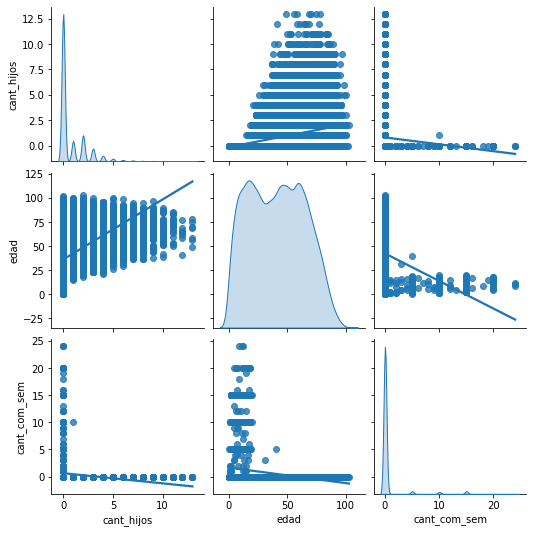

In [26]:
sns.pairplot(df_2022, kind="reg", diag_kind="kde")

## Cantidad de NaN por Columna

No se observan valores NaN en ninguna de las columnas del DataFrame, lo que indica que no hay datos faltantes.

In [27]:
# Calcular la cantidad de NaN por columna
nan_count_por_columna = df_2022.isna().sum()

# Mostrar los resultados
print("Cantidad de NaN por columna:")
print(nan_count_por_columna)


Cantidad de NaN por columna:
region                  0
sexo                    0
ascendencia             0
cant_hijos              0
edad                    0
atencion_salud          0
analfabeto              0
nivel_educ              0
tipo_educ               0
recibe_alim_ctr_educ    0
becas                   0
cant_com_sem            0
razon_no_fin_educ       0
recibe_pension          0
condicion_act_eco       0
tipo_vivienda           0
material_paredes        0
material_techo          0
material_pisos          0
tenencia_vivienda       0
origen_agua             0
fuente_energia_hog      0
calefon                 0
refrigerador            0
AA                      0
PC                      0
internet                0
vehiculo                0
cant_ciclomotor         0
servicio_dom            0
es_pobre                0
dtype: int64


## Heatmap de Correlación de Pearson

El heatmap de correlación de Pearson muestra que hay una correlación moderada positiva entre la edad y la cantidad de hijos (0.37). La cantidad de comida consumida semanalmente tiene una correlación negativa con la edad (-0.28).

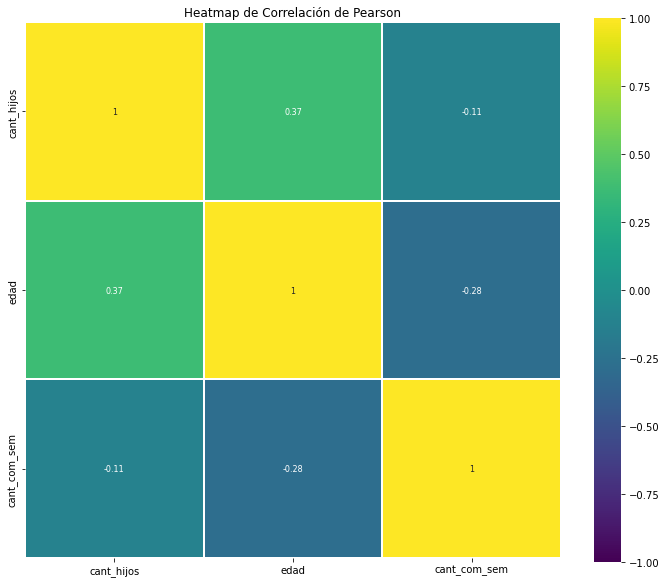

In [28]:
#Matriz de correlación (Heatmap)

# Calcula la correlación de Spearman entre las variables seleccionadas
corr = df_2022[['cant_hijos', 'edad', 'cant_com_sem', 'es_pobre']].corr(method='pearson')

# Configura el tamaño de la figura para el heatmap
plt.figure(figsize=(12, 10))

# Crea el heatmap usando seaborn
sns.heatmap(corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

# Título para el heatmap
plt.title('Heatmap de Correlación de Pearson')

# Muestra el gráfico
plt.show()

## Transformación de variables

### Dataframe con variables categóricas transformadas por OneHot Encoder para modelos de Naive Bayes y Regresión Logística.


In [29]:
df_2022['aux_es_pobre'] =  np.where(df_2022['es_pobre']== 1, True, False)
df_2022['aux_es_pobre'].describe()

count     55043
unique        2
top       False
freq      50397
Name: aux_es_pobre, dtype: object

In [30]:
if 'es_pobre' in categoricas:
    categoricas.remove('es_pobre')

### Conversión a Variables Dummies

Para aplicar Naive Bayes y regresión logística, necesitamos convertir las variables categóricas en variables numéricas usando one-hot encoding. El código siguiente transforma las variables categóricas en columnas dummies para asegurar que los datos sean compatibles con estos algoritmos de clasificación:

In [31]:
df_2022_oneHot = pd.get_dummies(df_2022.drop(['es_pobre'], axis=1),
                                columns=categoricas)

#
df_2022_oneHot.head()

,cant_hijos,edad,cant_com_sem,aux_es_pobre,region_1,region_2,region_3,region_4,sexo_1,sexo_2,...,PC_1,PC_2,internet_1,internet_2,vehiculo_1,vehiculo_2,cant_ciclomotor_1,cant_ciclomotor_2,servicio_dom_1,servicio_dom_2
0,0,75,0,False,1,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,1
1,0,31,0,False,1,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,1
2,0,29,0,False,1,0,0,0,0,1,...,1,0,1,0,1,0,0,1,0,1
3,0,26,0,False,1,0,0,0,0,1,...,1,0,1,0,1,0,0,1,0,1
4,0,50,0,False,1,0,0,0,0,1,...,1,0,1,0,1,0,0,1,0,1


### Se realiza una copia del dataframe original sin ninguna transformación para correr los modelos de DecisionTreeClassifie, BaggingClassifier, RandomForestClassifier y GradientBoostingClassifier

In [32]:
df_2022_arboles = df_2022.copy()

In [33]:
df_2022_arboles.head()

,region,sexo,ascendencia,cant_hijos,edad,atencion_salud,analfabeto,nivel_educ,tipo_educ,recibe_alim_ctr_educ,...,calefon,refrigerador,AA,PC,internet,vehiculo,cant_ciclomotor,servicio_dom,es_pobre,aux_es_pobre
0,1,2,3,0,75,2,1,0,0,0,...,1,1,1,1,1,2,2,2,0,False
1,1,1,3,0,31,2,1,10,1,0,...,1,1,1,1,1,1,2,2,0,False
2,1,2,3,0,29,2,1,0,0,0,...,1,1,1,1,1,1,2,2,0,False
3,1,2,3,0,26,2,1,0,0,0,...,1,1,1,1,1,1,2,2,0,False
4,1,2,3,0,50,2,1,0,0,0,...,1,1,2,1,1,1,2,2,0,False


##  Holdout: Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba.

### Partición en x1 e y1 para correr modelos de Naïve Bayes y Regresión Logística

In [34]:
y1 = df_2022_oneHot['aux_es_pobre']

In [35]:
x1 = df_2022_oneHot[df_2022_oneHot.columns.difference(['es_pobre', 'aux_es_pobre'])]

In [36]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1,
                                   random_state=semilla, 
                                   test_size=0.20, 
                                   shuffle=True)

In [37]:
print("Cantidad de observaciones total: {0}".format(len(x1)))
print("Cantidad de observaciones en train: {0}".format(len(X1_train)))
print("Cantidad de observaciones en test: {0}".format(len(X1_test)))

Cantidad de observaciones total: 55043
Cantidad de observaciones en train: 44034
Cantidad de observaciones en test: 11009


### Partición en x2 e y2 para correr modelos de Árboles de Decisión, Ensambles: Bagging, Random Forest, Boosting

In [38]:
y2 = df_2022_arboles['aux_es_pobre']

In [39]:
x2 = df_2022_arboles[df_2022_arboles.columns.difference(['es_pobre', 'aux_es_pobre'])]

In [40]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2,
                                   random_state=semilla, 
                                   test_size=0.20, 
                                   shuffle=True)

In [41]:
print("Cantidad de observaciones total: {0}".format(len(x2)))
print("Cantidad de observaciones en train: {0}".format(len(X2_train)))
print("Cantidad de observaciones en test: {0}".format(len(X2_test)))

Cantidad de observaciones total: 55043
Cantidad de observaciones en train: 44034
Cantidad de observaciones en test: 11009


#  Modelos de Técnicas de Clasificación

## 1 - Naive Bayes

In [42]:
#Defino el modelo
modelo_naive_bayes1 = MultinomialNB()

#Entreno el modelo
modelo_naive_bayes1.fit(X1_train, y1_train)

#Predicciones del modelo
y1_pred_NB = modelo_naive_bayes1.predict(X1_test)

In [43]:
#Error de clasificación
error_clasificación_NB1 = (y1_pred_NB != y1_test).sum()/y1_test.shape[0]
error_clasificación_NB1

0.16958851848487602

In [44]:
#Calculo la matriz de Confusión
matriz1_NB = confusion_matrix(y1_test, y1_pred_NB)
print('Matriz de Confusión:')
print(matriz1_NB)

Matriz de Confusión:
[[8527 1528]
 [ 339  615]]


In [45]:
#Calculo la precisión del modelo
precision1_NB = precision_score(y1_test, y1_pred_NB)
print('Precisión del modelo: %.3f' % precision1_NB)

#Calculo Accuracy del modelo
accuracy1_NB = accuracy_score(y1_test, y1_pred_NB)
print('Accuracy del modelo: %.3f' % accuracy1_NB)

#Calculo Recall del modelo
recall1_NB = recall_score(y1_test, y1_pred_NB)
print('Recall del modelo: %.3f' % recall1_NB)

#Calculo F1 score del modelo
f1_NB_1 = f1_score(y1_test, y1_pred_NB)
print('F1 del modelo: %.3f' % f1_NB_1)

Precisión del modelo: 0.287
Accuracy del modelo: 0.830
Recall del modelo: 0.645
F1 del modelo: 0.397


## 2- Regresión logística

In [46]:
#Defino el modelo
regresion_logistica1 = LogisticRegression(max_iter = 2000)

#Entreno el modelo
regresion_logistica1.fit(X1_train, y1_train)

#Predicciones del modelo
y1_pred_RL = regresion_logistica1.predict(X1_test)

In [47]:
#Error de clasificación
error_clasificación_RL1 = (y1_pred_RL != y1_test).sum()/y1_test.shape[0]
error_clasificación_RL1

0.06957943500772096

In [48]:
#Calculo la Matriz de Confusión
matriz1_RL = confusion_matrix(y1_test, y1_pred_RL)
print('Matriz de Confusión:')
print(matriz1_RL)

Matriz de Confusión:
[[9878  177]
 [ 589  365]]


In [49]:
#Calculo la precisión del modelo
precision1_RL = precision_score(y1_test, y1_pred_RL)
print('Precisión del modelo: %.3f' % precision1_RL)

#Calculo Accuracy del modelo
accuracy1_RL = accuracy_score(y1_test, y1_pred_RL)
print('Accuracy del modelo: %.3f' % accuracy1_RL)

#Calculo Recall del modelo
recall1_RL = recall_score(y1_test, y1_pred_RL)
print('Recall del modelo: %.3f' % recall1_RL)

#Calculo F1 score del modelo
f1_RL_1 = f1_score(y1_test, y1_pred_RL)
print('F1 del modelo: %.3f' % f1_RL_1)

Precisión del modelo: 0.673
Accuracy del modelo: 0.930
Recall del modelo: 0.383
F1 del modelo: 0.488


## Comparativa Error de Clasificación entre Naive Bayes y Regresión Logística.

In [50]:
## Erroes de Clasificación de DataFrame
print('Error de Clasificación - NB1: %.4f'% error_clasificación_NB1)
print('Error de Clasificación - RL1: %.4f'% error_clasificación_RL1)

Error de Clasificación - NB1: 0.1696
Error de Clasificación - RL1: 0.0696


En primera instancia, podemos decir que de acuerdo el modelo Naive Bayes respecto al modelo de Regresión Logística, y de acuerdo con la métrica de recall sobre la cual pondremos énfasis a la hora de seleccionar nuestros modelos, optaríamos por el modelo Bayesiano. Esta elección se reevaluará de acuerdo con los resultados que se obtengan en la sección de Oversampling y Undersampling.

## Ensambles: Bagging, Random Forest, Boosting

### Introducción

Los Árboles de Decisión son un método de aprendizaje supervisado, modelos que aprenden reglas simples basadas en características de los datos para en un caso de de un problema de clasificacón como en este caso, clasificar si una persona es pobre o no. Utilizan divisiones en nodos que representan decisiones basadas en características de los datos. Nos permite en caso, predecir si una persona es_pobre porque puede identificar patrones y relaciones en los datos que determinan la pobreza, permitiendo una clasificación precisa basada en múltiples variables explicativas.

Bagging es un meta-estimador, o sea, un método que combina múltiples modelos base para mejorar el rendimiento predictivo del modelo final, por ejemplo árboles de decisión, entrenados en subconjuntos aleatorios del conjunto de datos. Este tipo de meta-estimador se puede usar típicamente como una forma de reducir la varianza de un estimador de caja negra (por ejemplo, un árbol de decisión), al introducir aleatorización en su procedimiento de construcción y luego crear un conjunto a partir de él.

Random Forest es un algoritmo de aprendizaje supervisad que extiende el concepto de Bagging al construir múltiples árboles de decisión sobre submuestras aleatorias del conjunto de datos. Promedia las predicciones de estos árboles para mejorar la precisión y controlar el sobreajuste. Utiliza estrategias de división óptimas y ajusta el tamaño de las submuestras, ofreciendo un modelo robusto y flexible para la clasificación.

Boosting es una técnica de aprendizaje supervisado que combina varios modelos débiles, generalmente árboles de decisión, para crear un modelo fuerte y preciso. Este método trabaja secuencialmente, ajustando cada nuevo modelo para corregir los errores de los modelos anteriores, mejorando gradualmente el rendimiento global. 


### Optimización de hiperparametros - RandomizedSearchCV y GridSearchCV

Aplicamos RandomizedSearchCV y GridSearchCV para optimizar los hiperparámetros del DecisionTreeClassifier de manera eficiente y exhaustiva. Primero, utilizamos RandomizedSearchCV para explorar rápidamente el espacio de hiperparámetros probando combinaciones aleatorias, lo que nos permite reducir significativamente el tiempo de computación y descubrir combinaciones prometedoras. Una vez identificadas las mejores combinaciones iniciales, empleamos GridSearchCV para realizar una búsqueda exhaustiva y afinada dentro de un espacio más reducido de hiperparámetros, asegurando que se encuentren los valores óptimos finales. Este enfoque secuencial balancea eficiencia y precisión, optimizando el rendimiento del modelo para predecir la variable objetivo es_pobre de manera efectiva.

## 3 - DecisionTreeClassifier

In [51]:
# Crear un modelo de Decision Tree
decision_tree = DecisionTreeClassifier(random_state=semilla)

# Obtener los hiperparámetros del modelo
params = decision_tree.get_params()
print(params)


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1234, 'splitter': 'best'}


#### Hiperparametros optimizados:

Elegimos estos hiperparámetros para optimizar el DecisionTreeClassifier porque cada uno controla aspectos clave del modelo.
max_depth limita la profundidad del árbol para prevenir sobreajuste, max_features determina cuántas características considerar en cada división, criterion define el método para medir la calidad de una división, splitter introduce diversidad en las divisiones, y class_weight maneja el desbalanceo de clases. Optimizar estos hiperparámetros nos permite construir un modelo robusto y preciso para predecir la variable objetivo es_pobre.

### Randomized Search - DecisionTreeClassifier

In [52]:
# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'max_depth': [None, 10, 20, 30],                         # Profundidad máxima del árbol
    'max_features': ['auto', 'sqrt', 'log2', None],          # Máximo número de características a considerar en cada división
    'criterion': ['gini', 'entropy'],                        # Criterio para medir la calidad de la división
    'splitter': ['best', 'random'],                          # Estrategia utilizada para elegir la división en cada nodo
    'class_weight': ['balanced', None],                      # Ponderación de clase para manejar desbalanceo
                                            
}

# Configurar RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    decision_tree, 
    param_distributions=param_dist, 
    n_iter=iteracion_dt,  # Número de combinaciones a probar
    scoring='recall', 
    cv=k_folds,  # Número de folds para validación cruzada
    random_state=semilla,  # Fijar la semilla para reproducibilidad
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Entrenar el modelo utilizando la búsqueda aleatoria
random_search_dt.fit(X2_train, y2_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1234),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'splitter': ['best', 'random']},
                   random_state=1234, scoring='recall')

In [53]:
# Obtener los mejores hiperparámetros
best_params_dt = random_search_dt.best_params_
print("Mejores hiperparámetros encontrados:")
print(best_params_dt)


best_max_depth_RS_DT = best_params_dt['max_depth']
best_max_features_RS_DT = best_params_dt['max_features']
best_criterion_RS_DT = best_params_dt['criterion']
best_splitter_RS_DT = best_params_dt['splitter']
best_class_weight_RS_DT = best_params_dt['class_weight']

Mejores hiperparámetros encontrados:
{'splitter': 'best', 'max_features': None, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


In [54]:
print(best_max_depth_RS_DT)
print(best_max_features_RS_DT)
print(best_criterion_RS_DT)
print(best_splitter_RS_DT)
print(best_class_weight_RS_DT)

10
None
entropy
best
balanced


### Grid Search - DecisionTreeClassifier

In [55]:

# Definir el espacio de búsqueda de hiperparámetros alrededor de los mejores encontrados

param_grid = {
    'max_depth': np.arange(max(1, best_max_depth_RS_DT - 2), min(31, best_max_depth_RS_DT + 3)),
    'max_features': [best_max_features_RS_DT],
    'criterion': [best_criterion_RS_DT],
    'splitter': [best_splitter_RS_DT],
    'class_weight': [best_class_weight_RS_DT, None],
}


# Configurar GridSearchCV
grid_search_dt = GridSearchCV(
    decision_tree, 
    param_grid=param_grid, 
    scoring='recall', 
    cv=k_folds,  # Número de folds para validación cruzada
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Entrenar el modelo utilizando la búsqueda en cuadrícula
grid_search_dt.fit(X2_train, y2_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1234),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['entropy'],
                         'max_depth': array([ 8,  9, 10, 11, 12]),
                         'max_features': [None], 'splitter': ['best']},
             scoring='recall')

In [56]:
# Obtener los mejores hiperparámetros
best_params_grid_dt = grid_search_dt.best_params_
print("Mejores hiperparámetros encontrados con Grid Search:")
print(best_params_grid_dt)

# Obtener el mejor modelo
best_model_grid_dt = grid_search_dt.best_estimator_

# Evaluar el modelo en los datos de entrenamiento
train_recall_dt = recall_score(y2_train, best_model_grid_dt.predict(X2_train))
print("Recall en los datos de entrenamiento con los mejores parámetros:")
print(train_recall_dt)


Mejores hiperparámetros encontrados con Grid Search:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'splitter': 'best'}
Recall en los datos de entrenamiento con los mejores parámetros:
0.8764897074756229


### Modelo DecisionTreeClassifier con hiperparámetros Optimizados de acuerdo a Grid Search

In [57]:
# Predicción sobre el conjunto de prueba
y2_pred_dt = best_model_grid_dt.predict(X2_test)

In [58]:
#Calculo la precisión del modelo
precision_Tree = precision_score(y2_test, y2_pred_dt)
print('Precisión del modelo: %.3f' % precision_Tree)

#Calculo Accuracy del modelo
accuracy_Tree = accuracy_score(y2_test, y2_pred_dt)
print('Accuracy del modelo: %.3f' % accuracy_Tree)

#Calculo Recall del modelo
recall_Tree = recall_score(y2_test, y2_pred_dt)
print('Recall del modelo: %.3f' % recall_Tree)

#Calculo F1 score del modelo
f1_Tree = f1_score(y2_test, y2_pred_dt)
print('F1 del modelo: %.3f' % f1_Tree)

Precisión del modelo: 0.289
Accuracy del modelo: 0.808
Recall del modelo: 0.838
F1 del modelo: 0.430


### Cross Validation - DecisionTreeClassifier

In [59]:
# Realización de la validación cruzada

scores_dt = cross_val_score(best_model_grid_dt, X2_train, y2_train, cv=k_folds, scoring='recall')

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores_dt}")
print(f"Media del score de validación cruzada: {scores_dt.mean()}")

Scores de validación cruzada: [0.80758808 0.82113821 0.84864865 0.83513514 0.85365854 0.84823848
 0.85094851 0.83739837 0.82926829 0.82384824]
Media del score de validación cruzada: 0.8355870504650993


In [60]:
recall_train_dt = train_recall_dt
recall_test_dt = recall_Tree
recall_cv_dt = scores_dt.mean()

## 4 - Bagging

In [61]:
# Crear un modelo de Bagging Classifier
base_est = DecisionTreeClassifier(max_depth=15, class_weight = "balanced", random_state=semilla)
Bagging_classifier = BaggingClassifier(random_state=semilla)

# Obtener los hiperparámetros del modelo
params = Bagging_classifier.get_params()
print(params)

{'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 1234, 'verbose': 0, 'warm_start': False}


#### Hiperparametros optimizados:

Elegimos los hiperparámetros `n_estimators`, `max_samples` y `max_features` para optimizar el BaggingClassifier debido a su impacto en el rendimiento y la generalización del modelo. `n_estimators` controla el número de clasificadores base, mejorando la reducción de varianza con más estimadores, aunque incrementa el costo computacional. `max_samples` ajusta la proporción de muestras usadas para entrenar cada clasificador, ayudando a controlar el sobreajuste al diversificar los datos de entrenamiento. `max_features` limita la cantidad de características usadas en cada clasificador, reduciendo la correlación entre ellos y mejorando la capacidad de generalización. Optimizar estos parámetros permite equilibrar complejidad, variabilidad y costo computacional, asegurando un modelo robusto y eficiente.

### Randomized Search - Bagging

In [62]:
# Definir el espacio de búsqueda de hiperparámetros para Bagging
bagging_param_dist = {
    'n_estimators': [50, 100, 150],      # Número de estimadores en el ensamble
    'max_samples': [0.5, 0.7, 0.9, 1.0],     # Proporción de muestras a utilizar para cada estimador base
    'max_features':[0.5, 0.7, 0.9, 1.0],     #número máximo de características
}

# Configurar BaggingClassifier con RandomizedSearchCV
random_search_bagging = RandomizedSearchCV(
    BaggingClassifier(base_estimator=base_est, random_state=semilla),
    param_distributions=bagging_param_dist,
    n_iter=iteracion_Bag,         # Número de combinaciones a probar
    scoring='recall',  # Métrica de evaluación (cambia según tus necesidades)
    cv=k_folds,              # Número de folds para validación cruzada
    random_state=semilla,  # Fijar la semilla para reproducibilidad
    n_jobs=-1          # Usar todos los núcleos disponibles
)

# Entrenar el modelo utilizando la búsqueda aleatoria
random_search_bagging.fit(X2_train, y2_train)

RandomizedSearchCV(cv=10,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                     max_depth=15,
                                                                                     random_state=1234),
                                               random_state=1234),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_features': [0.5, 0.7, 0.9, 1.0],
                                        'max_samples': [0.5, 0.7, 0.9, 1.0],
                                        'n_estimators': [50, 100, 150]},
                   random_state=1234, scoring='recall')

In [63]:
# Obtener los mejores hiperparámetros para Bagging
best_params_bagging = random_search_bagging.best_params_
print("Mejores hiperparámetros encontrados para Bagging:")
print(best_params_bagging)

best_n_estimators_RS_BAG = best_params_bagging['n_estimators']
best_max_samples_RS_BAG = best_params_bagging['max_samples']
best_max_features_RS_BAG = best_params_bagging['max_features']

Mejores hiperparámetros encontrados para Bagging:
{'n_estimators': 50, 'max_samples': 1.0, 'max_features': 1.0}


In [64]:
print(best_n_estimators_RS_BAG)
print(best_max_samples_RS_BAG)
print(best_max_features_RS_BAG)

50
1.0
1.0


### Grid Search - Bagging

In [65]:
# Definir el espacio de búsqueda de hiperparámetros alrededor de los mejores encontrados

param_grid_bagging = {
    'n_estimators': np.arange(max(1, best_n_estimators_RS_BAG - 10), best_n_estimators_RS_BAG + 11, 5),
    'max_samples': np.linspace(max(0.1, best_max_samples_RS_BAG - 0.1), min(1.0, best_max_samples_RS_BAG + 0.1), 5),
    'max_features': np.linspace(max(0.1, best_max_features_RS_BAG - 0.1), min(1.0, best_max_features_RS_BAG + 0.1), 5),
}

# Configurar GridSearchCV
grid_search_bagging = GridSearchCV(
    BaggingClassifier(base_estimator=base_est, random_state=semilla),
    param_grid=param_grid_bagging,
    scoring='recall', 
    cv=k_folds,  # Número de folds para validación cruzada
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Entrenar el modelo utilizando la búsqueda en cuadrícula
grid_search_bagging.fit(X2_train, y2_train)



GridSearchCV(cv=10,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                               max_depth=15,
                                                                               random_state=1234),
                                         random_state=1234),
             n_jobs=-1,
             param_grid={'max_features': array([0.9  , 0.925, 0.95 , 0.975, 1.   ]),
                         'max_samples': array([0.9  , 0.925, 0.95 , 0.975, 1.   ]),
                         'n_estimators': array([40, 45, 50, 55, 60])},
             scoring='recall')

In [66]:
# Obtener los mejores hiperparámetros
best_params_grid_bagging = grid_search_bagging.best_params_
print("Mejores hiperparámetros encontrados con Grid Search para Bagging:")
print(best_params_grid_bagging)

# Obtener el mejor modelo
best_model_grid_bagging = grid_search_bagging.best_estimator_


# Evaluar el modelo en los datos de entrenamiento
train_recall_grid_bagging = recall_score(y2_train, best_model_grid_bagging.predict(X2_train))
print("Recall en los datos de entrenamiento con los mejores parámetros para Bagging (Grid Search):")
print(train_recall_grid_bagging)

Mejores hiperparámetros encontrados con Grid Search para Bagging:
{'max_features': 0.975, 'max_samples': 1.0, 'n_estimators': 40}
Recall en los datos de entrenamiento con los mejores parámetros para Bagging (Grid Search):
0.9731852654387866


### Modelo Bagging con hiperparámetros Optimizados de acuerdo a Grid Search

In [67]:
# Predicción sobre el conjunto de prueba
y2_pred_bagging = best_model_grid_bagging.predict(X2_test)

In [68]:
#Calculo la precisión del modelo
precision_Bagg = precision_score(y2_test, y2_pred_bagging)
print('Precisión del modelo: %.3f' % precision_Bagg)

#Calculo Accuracy del modelo
accuracy_Bagg = accuracy_score(y2_test, y2_pred_bagging)
print('Accuracy del modelo: %.3f' % accuracy_Bagg)

#Calculo Recall del modelo
recall_Bagg = recall_score(y2_test, y2_pred_bagging)
print('Recall del modelo: %.3f' % recall_Bagg)

#Calculo F1 score del modelo
f1_Bagg = f1_score(y2_test, y2_pred_bagging)
print('F1 del modelo: %.3f' % f1_Bagg)

Precisión del modelo: 0.461
Accuracy del modelo: 0.903
Recall del modelo: 0.704
F1 del modelo: 0.557


### Cross Validation - Bagging

In [69]:
# Realización de la validación cruzada

scores_Bagg = cross_val_score(best_model_grid_bagging, X2_train, y2_train, cv=k_folds, scoring='recall')

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores_Bagg}")
print(f"Media del score de validación cruzada: {scores_Bagg.mean()}")

Scores de validación cruzada: [0.63143631 0.63685637 0.71081081 0.67567568 0.71544715 0.6802168
 0.67750678 0.69105691 0.67479675 0.65311653]
Media del score de validación cruzada: 0.674692009082253


In [70]:
recall_train_Bagg = train_recall_grid_bagging
recall_test_Bagg = recall_Bagg
recall_cv_Bagg = scores_Bagg.mean()

## 5 - Random Forest

In [71]:
# Inicialización del modelo Random Forest
rf_model = RandomForestClassifier(random_state=semilla)

# Obtener los hiperparámetros del modelo
params = rf_model.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1234, 'verbose': 0, 'warm_start': False}


#### Hiperparametros optimizados:

Elegimos los hiperparámetros n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap y class_weight para optimizar el RandomForestClassifier debido a su impacto en el rendimiento del modelo. n_estimators controla el número de árboles, mejorando la precisión con más árboles. max_depth limita la profundidad de los árboles, ayudando a prevenir el sobreajuste. min_samples_split y min_samples_leaf controlan las divisiones y el tamaño mínimo de las hojas, suavizando el modelo. bootstrap introduce variabilidad adicional, mejorando la robustez, y class_weight maneja el desbalanceo de clases ajustando las ponderaciones. Optimizar estos parámetros balancea complejidad y precisión, asegurando un modelo robusto y eficiente.

### Randomized Search - Random Forest

In [72]:
# Definir el espacio de búsqueda de hiperparámetros para Random Forest
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None],
}


# Configurar RandomForestClassifier con RandomizedSearchCV para encontrar los mejores hiperparámetros
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=semilla),
    param_distributions=rf_param_dist,
    n_iter=iteracion_RF,  # Número de combinaciones a probar
    scoring='recall',
    cv=k_folds,  # Número de folds para validación cruzada
    random_state=semilla,  # Fijar la semilla para reproducibilidad
    n_jobs=-1  # Usar todos los núcleos disponibles
)


# Entrenar el modelo utilizando la búsqueda aleatoria
random_search_rf.fit(X2_train, y2_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=1234, scoring='recall')

In [73]:
# Obtener los mejores hiperparámetros para Bagging
best_params_rf = random_search_rf.best_params_
print("Mejores hiperparámetros encontrados para Random Forest:")
print(best_params_rf)

best_n_estimators_rf = best_params_rf['n_estimators']
best_max_depth_rf = best_params_rf['max_depth']
best_min_samples_split_rf = best_params_rf['min_samples_split']
best_min_samples_leaf_rf = best_params_rf['min_samples_leaf']
best_class_weight_rf = best_params_rf['class_weight']

Mejores hiperparámetros encontrados para Random Forest:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'class_weight': 'balanced'}


In [74]:
print(best_n_estimators_rf)
print(best_max_depth_rf)
print(best_min_samples_split_rf)
print(best_min_samples_leaf_rf)
print(best_class_weight_rf)

300
10
2
4
balanced


### Grid Search - Random Forest

In [75]:

# Definir el espacio de búsqueda alrededor de los mejores hiperparámetros encontrados
param_grid_rf = {
    'n_estimators': [best_n_estimators_rf - 10, best_n_estimators_rf, best_n_estimators_rf + 10],
    'max_depth': [best_max_depth_rf - 5, best_max_depth_rf, best_max_depth_rf + 5],
    'min_samples_split': [best_min_samples_split_rf, best_min_samples_split_rf + 1, best_min_samples_split_rf + 2],
    'min_samples_leaf': [best_min_samples_leaf_rf, best_min_samples_leaf_rf + 1],
    'class_weight': [best_class_weight_rf],
}

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=semilla),
    param_grid=param_grid_rf,
    scoring='recall', 
    cv=k_folds,  # Número de folds para validación cruzada
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Entrenar el modelo utilizando la búsqueda en cuadrícula
grid_search_rf.fit(X2_train, y2_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1234),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [290, 300, 310]},
             scoring='recall')

In [76]:
# Obtener los mejores hiperparámetros
best_params_grid_rf = grid_search_rf.best_params_
print("Mejores hiperparámetros encontrados con Grid Search para Random Forest:")
print(best_params_grid_rf)

# Obtener el mejor modelo
best_model_grid_rf = grid_search_rf.best_estimator_

# Evaluar el modelo en los datos de entrenamiento
train_recall_grid_rf = recall_score(y2_train, best_model_grid_rf.predict(X2_train))
print("Recall en los datos de entrenamiento con los mejores parámetros para Random Forest (Grid Search):")
print(train_recall_grid_rf)

Mejores hiperparámetros encontrados con Grid Search para Random Forest:
{'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Recall en los datos de entrenamiento con los mejores parámetros para Random Forest (Grid Search):
0.8567172264355363


### Modelo Random Forest con hiperparámetros Optimizados de acuerdo a Grid Search

In [77]:
# Predicción sobre el conjunto de prueba
y_pred_RF = best_model_grid_rf.predict(X2_test)

In [78]:
#Calculo la precisión del modelo
precision_RF = precision_score(y2_test, y_pred_RF)
print('Precisión del modelo: %.3f' % precision_RF)

#Calculo Accuracy del modelo
accuracy_RF = accuracy_score(y2_test, y_pred_RF)
print('Accuracy del modelo: %.3f' % accuracy_RF)

#Calculo Recall del modelo
recall_RF = recall_score(y2_test, y_pred_RF)
print('Recall del modelo: %.3f' % recall_RF)

#Calculo F1 score del modelo
f1_RF = f1_score(y2_test, y_pred_RF)
print('F1 del modelo: %.3f' % f1_RF)

Precisión del modelo: 0.274
Accuracy del modelo: 0.790
Recall del modelo: 0.858
F1 del modelo: 0.415


### Cross Validation - Random Forest 

In [79]:
# Realización de la validación cruzada

scores_RF = cross_val_score(best_model_grid_rf, X2_train, y2_train, cv=k_folds, scoring='recall')

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores_RF}")
print(f"Media del score de validación cruzada: {scores_RF.mean()}")

Scores de validación cruzada: [0.82113821 0.83468835 0.86756757 0.86486486 0.83468835 0.85636856
 0.85907859 0.85094851 0.83468835 0.8699187 ]
Media del score de validación cruzada: 0.8493950047608584


In [80]:
recall_train_RF = train_recall_grid_rf
recall_test_RF = recall_RF
recall_cv_RF = scores_RF.mean()

## 6 - Boosting

In [81]:
# Crear un modelo de Bagging Classifier
Boosting_Classifier = GradientBoostingClassifier(random_state=semilla)

# Obtener los hiperparámetros del modelo
params = Boosting_Classifier.get_params()
print(params)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 1234, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


#### Hiperparametros optimizados:

Elegimos los hiperparámetros n_estimators, learning_rate y max_depth para optimizar el modelo de boosting porque afectan significativamente su rendimiento. n_estimators controla el número de árboles, mejorando la precisión y reduciendo el sesgo, pero aumentando el costo computacional. learning_rate ajusta la contribución de cada árbol, balanceando la velocidad de aprendizaje y la robustez del modelo. max_depth limita la complejidad de los árboles, ayudando a evitar el sobreajuste. 

### Randomized Search - Boosting

In [82]:
# Definir el espacio de búsqueda de hiperparámetros para Gradient Boosting

gb_param_dist = {
    'n_estimators': [100, 150, 200],    # Número de árboles en el ensamble
    'learning_rate': [0.05, 0.1, 0.2], # Tasa de aprendizaje
    'max_depth': [3, 4, 5],          # Profundidad máxima de cada árbol base
}

# Configurar GradientBoostingClassifier con RandomizedSearchCV para encontrar los mejores hiperparámetros
random_search_gb = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=semilla),
    param_distributions=gb_param_dist,
    n_iter=iteracion_Boo,  # Número de combinaciones a probar
    scoring='recall',
    cv=k_folds,  # Número de folds para validación cruzada
    random_state=semilla,  # Fijar la semilla para reproducibilidad
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Entrenar el modelo utilizando la búsqueda aleatoria
random_search_gb.fit(X2_train, y2_train)

RandomizedSearchCV(cv=10,
                   estimator=GradientBoostingClassifier(random_state=1234),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 150, 200]},
                   random_state=1234, scoring='recall')

In [83]:
# Obtener los mejores hiperparámetros para Gradient Boosting
best_params_gb = random_search_gb.best_params_
print("Mejores hiperparámetros encontrados para Gradient Boosting:")
print(best_params_gb)

best_n_estimators_RS_gb = best_params_gb['n_estimators']
best_learning_rate_RS_gb = best_params_gb['learning_rate']
best_max_depth_RS_gb = best_params_gb['max_depth']


Mejores hiperparámetros encontrados para Gradient Boosting:
{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2}


### Grid Search - Boosting

In [84]:
# Definir el espacio de búsqueda alrededor de los mejores hiperparámetros encontrados para Gradient Boosting
param_grid_gb = {
    'n_estimators': [best_n_estimators_RS_gb - 10, best_n_estimators_RS_gb, best_n_estimators_RS_gb + 10],
    'learning_rate': [best_learning_rate_RS_gb - 0.05, best_learning_rate_RS_gb, best_learning_rate_RS_gb + 0.05],
    'max_depth': [best_max_depth_RS_gb - 2, best_max_depth_RS_gb, best_max_depth_RS_gb + 2],
}

# Configurar GridSearchCV para Gradient Boosting
grid_search_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=semilla),
    param_grid=param_grid_gb,
    scoring='recall', 
    cv=k_folds,  # Número de folds para validación cruzada
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Entrenar el modelo utilizando la búsqueda en cuadrícula
grid_search_gb.fit(X2_train, y2_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1234),
             n_jobs=-1,
             param_grid={'learning_rate': [0.15000000000000002, 0.2, 0.25],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [190, 200, 210]},
             scoring='recall')

In [85]:
# Obtener los mejores hiperparámetros para Gradient Boosting
best_params_grid_GS_gb = grid_search_gb.best_params_
print("Mejores hiperparámetros encontrados para Gradient Boosting con GridSearchCV:")
print(best_params_grid_GS_gb)

# Obtener el mejor modelo Gradient Boosting
best_model_grid_GS_gb = grid_search_gb.best_estimator_

# Evaluar el modelo Gradient Boosting en los datos de entrenamiento
train_recall_grid_gb = recall_score(y2_train, best_model_grid_GS_gb.predict(X2_train))
print("Recall en los datos de entrenamiento con los mejores parámetros para Gradient Boosting con GridSearchCV:")
print(train_recall_grid_gb)

Mejores hiperparámetros encontrados para Gradient Boosting con GridSearchCV:
{'learning_rate': 0.25, 'max_depth': 7, 'n_estimators': 200}
Recall en los datos de entrenamiento con los mejores parámetros para Gradient Boosting con GridSearchCV:
0.8591549295774648


### Modelo Boosting con hiperparámetros Optimizados de acuerdo a Grid Search

In [86]:
# Predicción sobre el conjunto de prueba
y_pred_Boo = best_model_grid_GS_gb.predict(X2_test)

In [87]:
#Calculo la precisión del modelo
precision_Boo = precision_score(y2_test, y_pred_Boo)
print('Precisión del modelo: %.3f' % precision_Boo)

#Calculo Accuracy del modelo
accuracy_Boo = accuracy_score(y2_test, y_pred_Boo)
print('Accuracy del modelo: %.3f' % accuracy_Boo)

#Calculo Recall del modelo
recall_Boo = recall_score(y2_test, y_pred_Boo)
print('Recall del modelo: %.3f' % recall_Boo)

#Calculo F1 score del modelo
f1_Boo = f1_score(y2_test, y_pred_Boo)
print('F1 del modelo: %.3f' % f1_Boo)

Precisión del modelo: 0.693
Accuracy del modelo: 0.936
Recall del modelo: 0.475
F1 del modelo: 0.563


### Cross Validation - Boosting

In [88]:
# Realización de la validación cruzada

scores_Boo = cross_val_score(best_model_grid_GS_gb, X2_train, y2_train, cv=k_folds, scoring='recall')

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores_Boo}")
print(f"Media del score de validación cruzada: {scores_Boo.mean()}")

Scores de validación cruzada: [0.45257453 0.46612466 0.49459459 0.45135135 0.51490515 0.50135501
 0.49864499 0.50135501 0.44173442 0.45528455]
Media del score de validación cruzada: 0.4777924265729143


In [89]:
recall_train_Boo = train_recall_grid_gb
recall_test_Boo = recall_Boo
recall_cv_Boo = scores_Boo.mean()

## Visulización Comparativa de Recalls - Train, CV y Test

In [90]:
# Crear diccionario de evaluación
evaluate = pd.DataFrame(            
    {'mod': pd.Series(['dt', 'Bagg', 'RF', 'Boo']).astype('category'),
     'recall_train': pd.Series([recall_train_dt, recall_train_Bagg, recall_train_RF, recall_train_Boo]).astype('float64'),
     'recall_cv': pd.Series([recall_cv_dt, recall_cv_Bagg, recall_cv_RF, recall_cv_Boo]).astype('float64'),
     'recall_test': pd.Series([recall_test_dt, recall_test_Bagg, recall_test_RF, recall_test_Boo]).astype('float64'),
     'f1_score_test': pd.Series([f1_Tree, f1_Bagg, f1_RF, f1_Boo]).astype('float64')
    }
)

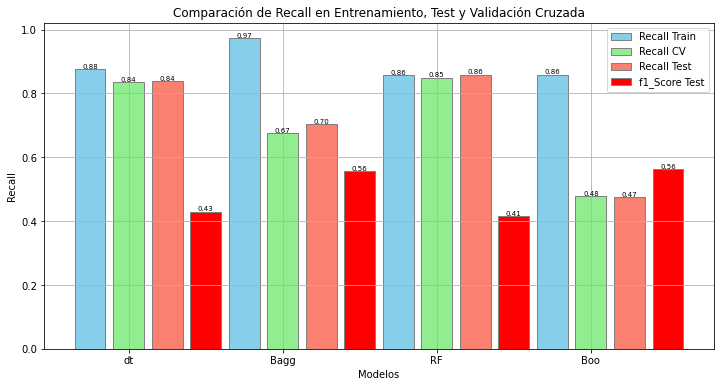

In [91]:
# Plot para evaluación
plt.figure(figsize=(12, 6))

# Definir el ancho de las barras y el espacio entre grupos de barras
bar_width = 0.2
space = 0.05

# Posición de las barras en el eje x
r1 = np.arange(len(evaluate))
r2 = [x + bar_width + space for x in r1]
r3 = [x + 2 * (bar_width + space) for x in r1]
r4 = [x + 3 * (bar_width + space) for x in r1]

# Graficar los resultados
plt.bar(r1, evaluate['recall_train'], color='skyblue', width=bar_width, edgecolor='grey', label='Recall Train')
plt.bar(r2, evaluate['recall_cv'], color='lightgreen', width=bar_width, edgecolor='grey', label='Recall CV')
plt.bar(r3, evaluate['recall_test'], color='salmon', width=bar_width, edgecolor='grey', label='Recall Test')
plt.bar(r4, evaluate['f1_score_test'], color='red', width=bar_width, edgecolor='grey', label='f1_Score Test')

# Mostrar los valores en cada barra
for i, row in evaluate.iterrows():
    plt.text(r1[i], row['recall_train'], f'{row["recall_train"]:.2f}', ha='center', va='bottom', fontsize=7)   
    plt.text(r2[i], row['recall_cv'], f'{row["recall_cv"]:.2f}', ha='center', va='bottom', fontsize=7)
    plt.text(r3[i], row['recall_test'], f'{row["recall_test"]:.2f}', ha='center', va='bottom', fontsize=7)
    plt.text(r4[i], row['f1_score_test'], f'{row["f1_score_test"]:.2f}', ha='center', va='bottom', fontsize=7)

# Añadir etiquetas y título
plt.xlabel('Modelos')
plt.ylabel('Recall')
plt.title('Comparación de Recall en Entrenamiento, Test y Validación Cruzada')

# Añadir leyenda y especificar posición
plt.legend(loc='upper right')

# Ajustar las etiquetas del eje x
plt.xticks([r + bar_width + space for r in range(len(evaluate))], evaluate['mod'])

# Mostrar la gráfica
plt.grid(True)
plt.show()

##  Tabla Comparativa - Resultados de Recall.

In [92]:
evaluate

,mod,recall_train,recall_cv,recall_test,f1_score_test
0,dt,0.876490,0.835587,0.837526,0.430148
1,Bagg,0.973185,0.674692,0.704403,0.557214
2,RF,0.856717,0.849395,0.858491,0.414894
3,Boo,0.859155,0.477792,0.474843,0.563433


El recall es crítico en este problema porque queremos asegurarnos de identificar correctamente a todas las personas que son pobres (minimizando los falsos negativos). 

El modelo Random Forest (RF) muestra un recall consistente entre los conjuntos de entrenamiento (0.856717), validación cruzada (0.849395) y prueba (0.858491). Esta consistencia indica que el modelo generaliza bien y no está sobreajustado a los datos de entrenamiento. En comparación, el modelo Decision Tree (dt), que presenta resultados muy similares, también muestra consistencia entre entrenamiento y validación cruzada, si bien su F1 score es levente más alto (0.430148), El Recall en test (0.837526) es levente menor rescpecto al de Random Forest. Los modelos Bagging (Bagg) y Boosting (Boo) tienen una gran caída en recall del entrenamiento a validación cruzada y prueba, lo que indica un probable sobreajuste.

El F1 score es importante porque equilibra la precisión y el recall, proporcionando una medida de rendimiento más completa, especialmente cuando hay una clase minoritaria significativa. Si bien el modelo Random Forest (RF) tiene un F1 score (0.414894) que es el más bajo respecto al resto de los modelos, se comprende que el mismo debe ser optimizado, de todas formas mantenemos nuestra postura respecto a su elección de acuerdo a lo mencionado con anterioridad. 

Por otro lado, el modelo Boosting (Boo) tiene el F1 score más alto (0.563433), pero su recall muy bajo en validación cruzada y prueba (0.477792 y 0.474843 respectivamente) indica que no está identificando adecuadamente a las personas pobres.

Un modelo sobreajustado funcionará bien en el conjunto de entrenamiento pero fallará en generalizar a nuevos datos. El modelo Random Forest (RF) muestra un equilibrio entre evitar el sobreajuste y mantener un buen rendimiento en nuevos datos.

En el contexto de predecir la pobreza, es crucial maximizar el recall para asegurar que la mayor cantidad de personas pobres posible sea identificada, ya que no identificar a una persona pobre (falso negativo) podría tener consecuencias con impacto negatvio en la implementaión de politicas que se aplique para atender la situación de pobreza en pais. Por lo tanto, aunque el modelo Boosting (Boo) tiene el F1 score más alto, su bajo recall en validación cruzada y prueba lo hace menos adecuado para este problema específico. Consideramos que el modelo **Random Forest (RF)**, con su consistencia en recall, es la mejor opción para asegurar la identificación adecuada de las personas pobres.

# Ovsersampling - Undersampling  - Stacking

**Oversampling** o sobre-muestreo, es una técnica utilizada cuando se enfrenta un desequilibrio significativo entre las clases en un conjunto de datos de clasificación. Este desequilibrio ocurre cuando una clase es mucho más frecuente que otra, lo que puede llevar a que el modelo aprenda a clasificar mayoritariamente en función de la clase dominante.

**SMOTE** crea una sobremuesta de la variable para la que tenemos menor cantidad de observaciones. Este método crea ejemplos sintéticos nuevos para la clase minoritaria, basados en los ejemplos existentes de esa clase. Para nuestro caso de estudio, aplica a las observaciones para las personas que son pobres debido a su poca representación en la muestra, y asi genrar un Dataset de test y train balanceado.

**Undersampling** o sub-muestreo, es una técnica utilizada para abordar el desequilibrio de clases en conjuntos de datos de clasificación. Se aplica específicamente a la clase mayoritaria reduciendo el número de ejemplos de esta clase hasta que se equilibre mejor con la clase minoritaria.

Basicamente, elimina del dataframe observaciones de la clase mayoritaria de forma aleatoria y asi genra un Dataset de test y train balanceado.

**Stacking** es un enfoque que busca mejorar la precisión predictiva combinando múltiples modelos. Utiliza diferentes tipos de modelos base, como Árboles de Decisión, Regresión Logística, entre otros. 
En nuestro caso, vamos a utilizar Random Forest, Bagging y Boosting. Cada uno de estos modelos base se entrena de manera independiente con el conjunto de datos original y genera predicciones. Estas predicciones de los modelos base se convierten en nuevas características que se utilizan como entradas para un modelo adicional, conocido como meta-estimador, que en nuestro caso aplicaremos un Random Forest. El objetivo del mismo es aprender cómo combinar estas predicciones para producir una predicción final más precisa y generalizable.

## Ovsersampling -  Partición de Test y Train

### Naïve Bayes - Regresión Logística - Ovsersampling

In [93]:
smote1 = SMOTE(random_state = semilla)
x1_smote, y1_smote = smote1.fit_resample(x1, y1)

In [94]:
print(f'''Cantidad de observaciones antes del Oversampling: {x1.shape}
Cantidad de observaciones luego de Oversampling: {x1_smote.shape}''')

Cantidad de observaciones antes del Oversampling: (55043, 136)
Cantidad de observaciones luego de Oversampling: (100794, 136)


In [95]:
x1_train_smo, x1_test_smo, y1_train_smo, y1_test_smo = train_test_split(x1_smote, y1_smote,
                                   random_state=semilla, 
                                   test_size=0.20, 
                                   shuffle=True)

### Ensambles: Bagging, Random Forest, Boosting  - Ovsersampling

In [96]:
smote2 = SMOTE(random_state = semilla)
x2_smote, y2_smote = smote2.fit_resample(x2, y2)

In [97]:
print(f'''Cantidad de observaciones antes del Oversampling: {x2.shape}
Cantidad de observaciones luego de Oversampling: {x2_smote.shape}''')

Cantidad de observaciones antes del Oversampling: (55043, 30)
Cantidad de observaciones luego de Oversampling: (100794, 30)


In [98]:
x2_train_smo, x2_test_smo, y2_train_smo, y2_test_smo = train_test_split(x2_smote, y2_smote,
                                   random_state=semilla, 
                                   test_size=0.20, 
                                   shuffle=True)

## Undersampling -  Partición de Test y Train

### Naïve Bayes - Regresión Logística - Undersampling

In [99]:
randundersamp1 = RandomUnderSampler(random_state = semilla)
x1_undsamp, y1_undsamp = randundersamp1.fit_resample(x1, y1)

In [100]:
print(f'''Cantidad de observaciones antes del  Undersampling: {x1.shape}
Cantidad de observaciones luego de Undersampling: {x1_undsamp.shape}''')

Cantidad de observaciones antes del  Undersampling: (55043, 136)
Cantidad de observaciones luego de Undersampling: (9292, 136)


In [101]:
x1_train_us, x1_test_us, y1_train_us, y1_test_us = train_test_split(x1_undsamp, y1_undsamp,
                                   random_state=semilla, 
                                   test_size=0.20, 
                                   shuffle=True)

### Ensambles: Bagging, Random Forest, Boosting  - Undersampling

In [102]:
randundersamp2 = RandomUnderSampler(random_state = semilla)
x2_undsamp, y2_undsamp = randundersamp2.fit_resample(x2, y2)

In [103]:
print(f'''Cantidad de observaciones antes del  Undersampling: {x2.shape}
Cantidad de observaciones luego de Undersampling: {x2_undsamp.shape}''')

Cantidad de observaciones antes del  Undersampling: (55043, 30)
Cantidad de observaciones luego de Undersampling: (9292, 30)


In [104]:
x2_train_us, x2_test_us, y2_train_us, y2_test_us = train_test_split(x2_undsamp, y2_undsamp,
                                   random_state=semilla, 
                                   test_size=0.20, 
                                   shuffle=True)

## Modelo Naïve Bayes - Oversampling: ##

In [105]:
#Defino el modelo
modelo_naive_bayes_smo = MultinomialNB()

#Entreno el modelo
modelo_naive_bayes_smo.fit(x1_train_smo, y1_train_smo)

#Predicciones del modelo
y_pred_NB_smo = modelo_naive_bayes_smo.predict(x1_test_smo)

In [106]:
(y_pred_NB_smo != y1_test_smo).sum()/y1_test_smo.shape[0]

0.22977330224713527

In [107]:
#Calculo la precisión del modelo
precision1_NB_smo = precision_score(y1_test_smo, y_pred_NB_smo)
print('Precisión del modelo: %.3f' % precision1_NB_smo)

#Calculo Accuracy del modelo
accuracy1_NB_smo = accuracy_score(y1_test_smo, y_pred_NB_smo)
print('Accuracy del modelo: %.3f' % accuracy1_NB_smo)

#Calculo Recall del modelo
recall1_NB_smo = recall_score(y1_test_smo, y_pred_NB_smo)
print('Recall del modelo: %.3f' % recall1_NB_smo)

#Calculo F1 score del modelo
f1_NB_1_smo = f1_score(y1_test_smo, y_pred_NB_smo)
print('F1 del modelo: %.3f' % f1_NB_1_smo)

Precisión del modelo: 0.815
Accuracy del modelo: 0.770
Recall del modelo: 0.698
F1 del modelo: 0.752


## Regresión Logística - Ovsersampling: ##

In [108]:
#Defino el modelo
regresion_logistica_smo = LogisticRegression(max_iter = 2000)

#Entreno el modelo
regresion_logistica_smo.fit(x1_train_smo, y1_train_smo)

#Predicciones del modelo
y_pred_RL_smo = regresion_logistica_smo.predict(x1_test_smo)

In [109]:
(y_pred_RL_smo != y1_test_smo).sum()/y1_test_smo.shape[0]

0.04062701522893001

In [110]:
#Calculo la precisión del modelo
precision1_RL_smo = precision_score(y1_test_smo, y_pred_RL_smo)
print('Precisión del modelo: %.3f' % precision1_RL_smo)

#Calculo Accuracy del modelo
accuracy1_RL_smo = accuracy_score(y1_test_smo, y_pred_RL_smo)
print('Accuracy del modelo: %.3f' % accuracy1_RL_smo)

#Calculo Recall del modelo
recall1_RL_smo = recall_score(y1_test_smo, y_pred_RL_smo)
print('Recall del modelo: %.3f' % recall1_RL_smo)

#Calculo F1 score del modelo
f1_RL_1_smo = f1_score(y1_test_smo, y_pred_RL_smo)
print('F1 del modelo: %.3f' % f1_RL_1_smo)

Precisión del modelo: 0.979
Accuracy del modelo: 0.959
Recall del modelo: 0.939
F1 del modelo: 0.959


## Naïve Bayes - Undersampling:

In [111]:
#Defino el modelo
modelo_naive_bayes_us = MultinomialNB()

#Entreno el modelo
modelo_naive_bayes_us.fit(x1_train_us, y1_train_us)

#Predicciones del modelo
y_pred_NB_us = modelo_naive_bayes_us.predict(x1_test_us)

In [112]:
(y_pred_NB_us != y1_test_us).sum()/y1_test_us.shape[0]

0.2485207100591716

In [113]:
#Calculo la precisión del modelo
precision1_NB_us = precision_score(y1_test_us, y_pred_NB_us)
print('Precisión del modelo: %.3f' % precision1_NB_us)

#Calculo Accuracy del modelo
accuracy1_NB_us = accuracy_score(y1_test_us, y_pred_NB_us)
print('Accuracy del modelo: %.3f' % accuracy1_NB_us)

#Calculo Recall del modelo
recall1_NB_us = recall_score(y1_test_us, y_pred_NB_us)
print('Recall del modelo: %.3f' % recall1_NB_us)

#Calculo F1 score del modelo
f1_NB_1_us = f1_score(y1_test_us, y_pred_NB_us)
print('F1 del modelo: %.3f' % f1_NB_1_us)

Precisión del modelo: 0.770
Accuracy del modelo: 0.751
Recall del modelo: 0.719
F1 del modelo: 0.743


## Regresión Logística - Undersampling: ##

In [114]:
#Defino el modelo
regresion_logistica_us = LogisticRegression(max_iter = 2000)

#Entreno el modelo
regresion_logistica_us.fit(x1_train_us, y1_train_us)

#Predicciones del modelo
y_pred_RL_us = regresion_logistica_us.predict(x1_test_us)

In [115]:
(y_pred_RL_us != y1_test_us).sum()/y1_test_us.shape[0]

0.15976331360946747

In [116]:
#Calculo la precisión del modelo
precision1_RL_us = precision_score(y1_test_us, y_pred_RL_us)
print('Precisión del modelo: %.3f' % precision1_RL_us)

#Calculo Accuracy del modelo
accuracy1_RL_us = accuracy_score(y1_test_us, y_pred_RL_us)
print('Accuracy del modelo: %.3f' % accuracy1_RL_us)

#Calculo Recall del modelo
recall1_RL_us = recall_score(y1_test_us, y_pred_RL_us)
print('Recall del modelo: %.3f' % recall1_RL_us)

#Calculo F1 score del modelo
f1_RL_1_us = f1_score(y1_test_us, y_pred_RL_us)
print('F1 del modelo: %.3f' % f1_RL_1_us)

Precisión del modelo: 0.827
Accuracy del modelo: 0.840
Recall del modelo: 0.860
F1 del modelo: 0.844


## Visualización Gráfica de Recall Ovsersampling - Undersampling: ##

In [117]:
# Crear diccionario de evaluación
evaluate2 = pd.DataFrame(            
    {'mod': pd.Series(['NB', 'RL']).astype('category'),
     'recall_smo': pd.Series([recall1_NB_smo, recall1_RL_smo]).astype('float64'),
     'recall_us': pd.Series([recall1_NB_us, recall1_RL_us]).astype('float64'),

    }
)

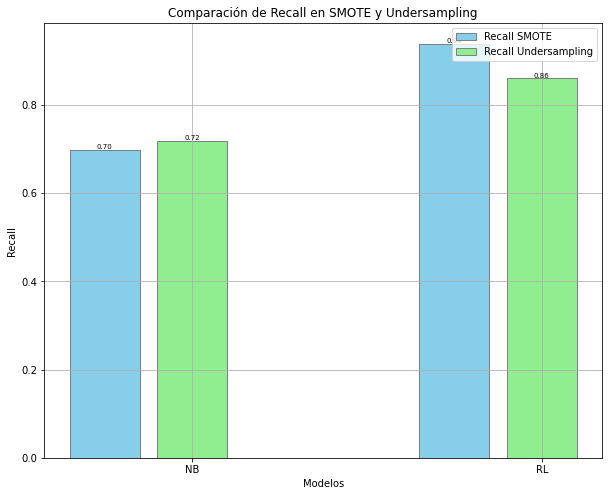

In [118]:
# Plot para evaluación
plt.figure(figsize=(10, 8))

# Definir el ancho de las barras y el espacio entre grupos de barras
bar_width = 0.2
space = 0.05

# Posición de las barras en el eje x
r1 = np.arange(len(evaluate2))
r2 = [x + bar_width + space for x in r1]
r3 = [x + 2 * (bar_width + space) for x in r1]

# Graficar los resultados
plt.bar(r1, evaluate2['recall_smo'], color='skyblue', width=bar_width, edgecolor='grey', label='Recall SMOTE')
plt.bar(r2, evaluate2['recall_us'], color='lightgreen', width=bar_width, edgecolor='grey', label='Recall Undersampling')


# Mostrar los valores en cada barra
for i, row in evaluate2.iterrows():
    plt.text(r1[i], row['recall_smo'], f'{row["recall_smo"]:.2f}', ha='center', va='bottom', fontsize=7)   
    plt.text(r2[i], row['recall_us'], f'{row["recall_us"]:.2f}', ha='center', va='bottom', fontsize=7)
    

# Añadir etiquetas y título
plt.xlabel('Modelos')
plt.ylabel('Recall')
plt.title('Comparación de Recall en SMOTE y Undersampling')

# Añadir leyenda y especificar posición
plt.legend(loc='upper right')

# Ajustar las etiquetas del eje x
plt.xticks([r + bar_width + space for r in range(len(evaluate2))], evaluate2['mod'])

# Mostrar la gráfica
plt.grid(True)
plt.show()

En última instancia respecto a los modelos de Naïve Bayes y Regresión Logística, una vez aplicado tanto Oversampling como Undersampling, podemos concluir que en cualquiera de los dos escenarios, Regresión Logística obtiene mejores resultados en todas las métricas evaluadas del modelo.

# Modelos de Stacking: 

In [119]:
num_est_st = 100

In [120]:
x2_train_st, x2_test_st, y2_train_st, y2_test_st = train_test_split(x2, y2,
                                   random_state=semilla, 
                                   test_size=0.20, 
                                   shuffle=True)

In [121]:
model_rf = RandomForestClassifier(n_estimators=num_est_st, random_state = semilla)
model_rf_st = model_rf.fit(x2_train_st, y2_train_st)

model_bagging = BaggingClassifier(n_estimators = num_est_st, random_state = semilla)
model_bagging_st = model_bagging.fit(x2_train_st, y2_train_st)

model_boosting = GradientBoostingClassifier(n_estimators = num_est_st, random_state = semilla)
model_boosting_st= model_boosting.fit(x2_train_st, y2_train_st)

In [122]:
rf_clf = model_rf_st
bagging_clf = model_bagging_st
boosting_clf = model_boosting_st

rf_meta = RandomForestClassifier(random_state=semilla)

# Definir el clasificador stacking
stacking_clf = StackingClassifier(classifiers=[rf_clf, bagging_clf, boosting_clf],
                                  meta_classifier=rf_meta,
                                  use_probas=False,  # Utilizar predicciones directas en lugar de probabilidades
                                  average_probas=False,  # No promediar las probabilidades de los clasificadores base
                                  )

# Entrenar el modelo de stacking
stacking_clf.fit(x2_train_st, y2_train_st)

# Predecir en el conjunto de prueba
y2_pred_stack = stacking_clf.predict(x2_test_st)

# Calcular el recall en el conjunto de prueba
recall_st = recall_score(y2_test_st, y2_pred_stack)
print(f'Recall del modelo de stacking: {recall_st:.3f}')

Recall del modelo de stacking: 0.464


### Stacking con Oversampling: ###

In [123]:
model_rf_smo = RandomForestClassifier(n_estimators=num_est_st, random_state = semilla)
model_rf_st_smo = model_rf_smo.fit(x2_train_smo, y2_train_smo)

model_bagging_smo = BaggingClassifier(n_estimators = num_est_st, random_state = semilla)
model_bagging_st_smo = model_bagging_smo.fit(x2_train_smo, y2_train_smo)

model_boosting_smo = GradientBoostingClassifier(n_estimators = num_est_st, random_state = semilla)
model_boosting_st_smo= model_boosting_smo.fit(x2_train_smo, y2_train_smo)


In [124]:
rf_clf_smo = model_rf_st_smo
bagging_clf_smo = model_bagging_st_smo
boosting_clf_smo = model_boosting_st_smo

rf_meta = RandomForestClassifier(random_state=semilla)

# Definir el clasificador stacking
stacking_clf_smo = StackingClassifier(classifiers=[rf_clf_smo, bagging_clf_smo, boosting_clf_smo],
                                  meta_classifier=rf_meta,
                                  use_probas=False,  # Utilizar predicciones directas en lugar de probabilidades
                                  average_probas=False,  # No promediar las probabilidades de los clasificadores base
                                  )

# Entrenar el modelo de stacking
stacking_clf_smo.fit(x2_train_smo, y2_train_smo)

# Predecir en el conjunto de prueba
y2_pred_st_smo = stacking_clf.predict(x2_test_smo)

# Calcular el recall en el conjunto de prueba
recall_st_smo = recall_score(y2_test_smo, y2_pred_st_smo)
print(f'Recall del modelo de stacking: {recall_st_smo:.3f}')

Recall del modelo de stacking: 0.560


### Stacking con Undersampling: ###

In [125]:
model_rf_us = RandomForestClassifier(n_estimators=num_est_st, random_state = semilla)
model_rf_st_us= model_rf_us.fit(x2_train_us, y2_train_us)

model_bagging_us = BaggingClassifier(n_estimators = num_est_st, random_state = semilla)
model_bagging_st_us = model_bagging_us.fit(x2_train_us, y2_train_us)

model_boosting_us = GradientBoostingClassifier(n_estimators = num_est_st, random_state = semilla)
model_boosting_st_us= model_boosting_us.fit(x2_train_us, y2_train_us)

In [126]:
rf_clf_us = model_rf_st_us
bagging_clf_us = model_bagging_st_us
boosting_clf_us = model_boosting_st_us

rf_meta = RandomForestClassifier(random_state=semilla)

# Definir el clasificador stacking
stacking_clf_us = StackingClassifier(classifiers=[rf_clf_us, bagging_clf_us, boosting_clf_us],
                                  meta_classifier=rf_meta,
                                  use_probas=False,  # Utilizar predicciones directas en lugar de probabilidades
                                  average_probas=False,  # No promediar las probabilidades de los clasificadores base
                                  )

# Entrenar el modelo de stacking
stacking_clf_us.fit(x2_train_us, y2_train_us)

# Predecir en el conjunto de prueba
y2_pred_st_us = stacking_clf_us.predict(x2_test_us)

# Calcular el recall en el conjunto de prueba
recall_st_us = recall_score(y2_test_us, y2_pred_st_us)
print(f'Recall del modelo de stacking: {recall_st_us:.3f}')

Recall del modelo de stacking: 0.865


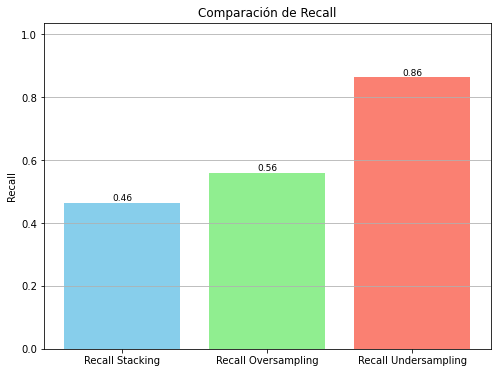

In [127]:
labels = ['Recall Stacking', 'Recall Oversampling', 'Recall Undersampling']
errors = [recall_st, recall_st_smo, recall_st_us]  

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, errors, color=['skyblue', 'lightgreen', 'salmon'])  # Colores para las barras
plt.title('Comparación de Recall')
plt.ylabel('Recall')
plt.ylim(0, max(errors) * 1.2)  # Ajustar el rango del eje y para dejar espacio para las etiquetas
plt.grid(axis='y')

# Mostrar los valores en las barras
for bar, error in zip(bars, errors):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{error:.2f}', 
             ha='center', va='bottom', fontsize=9)

plt.show()

Aplicamos técnica de stacking utilizando modelos base de Random Forest, Bagging y Boosting, con un meta-estimador RandomForestClassifier, a su vez, realizamos Oversampling y Undersampling sobre stacking. Basándonos en los resultados obtenidos respecto del recall en test, nos inclinamos notoriamente por el modelo de stacking con aplicación de Undersampling.

Para este modelo, por cuestiones de recursos computacionales y tiempos de ejecución decidimos utilizar n_estimators en 100, que es el número de árboles individuales en los ensambles, para todos los modelos base, lo cual puede estar teniendo un impacto negativo en los resultados obtenidos de stacking, ya que a un mayor número de arboles el resultado posiblemente mejoraría.

### Oportunidades de Mejora: ###


Por otra parte, a modo crítica de nuestro trabajo, no hemos comparado los modelos de Stacking respecto de los modelos de ensambles obtenidos con anterioridad por cuestiones de tiempo. Esto se debe a que no realizamos Cross Validation así como tampoco obtuvimos las restantes métricas de performance además de Recall, lo que no nos permite comparar de forma equitativa con los demás modelos.

Consideramos que debimos haber puesto más enfoque sobre la métrica de F1_Score, ya que todo nuestro proyecto esta fuertemente basado en Recall. Además, entendemos que los resultados de nuestros modelos en test, no siempre se mantienen por debajo de entrenamiento y Cross Validation, lo cual intentamos mejorar sin mayor éxito.

Por último, nuevamente por cuestiones de tiempos de ejecución, decidimos considerar las iteraciones en 100 para cada modelo de ensamble como se define al principio del presente trabajo, si bien la ejecución del codigo es más eficiente, esto puede haber impactado de forma perjudicial en el resultado de nuestros modelos, ya que de haber aumentado las iteraciones a valores notoriamente superiores los resultados podrian haber sido diferentes e incluso hasta mejores.